In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
import pipeline_classification

# CREATE DATAFRAME

In [5]:
FILES = ['cleaned_data/cambodia_2014_cleaned.csv', 
         'cleaned_data/Maldives_2016_cleaned.csv', 
         'cleaned_data/Nepal_2016_cleaned.csv',
         'cleaned_data/Pakistan_2017_cleaned.csv',
         'cleaned_data/Philippines_2017_cleaned.csv']

COUNTRY_DATA = {
    'Cambodia': 'cleaned_data/cambodia_2014_cleaned.csv', 
    'Maldives': 'cleaned_data/Maldives_2016_cleaned.csv', 
    'Nepal': 'cleaned_data/Nepal_2016_cleaned.csv',
    'Pakistan': 'cleaned_data/Pakistan_2017_cleaned.csv',
    'Philippines': 'cleaned_data/Philippines_2017_cleaned.csv'   
}

In [32]:
def create_df_each_country():
    
    df_dic = {}
    for country, file in COUNTRY_DATA.items():
        df = pd.read_csv(file)
        df_dic[country] = df
        
        if 'country' in df.columns:
            df.drop(columns=['country'],inplace=True)
    return df_dic

In [22]:
def create_df_all_countries():
    
    for country, file in COUNTRY_DATA.items():
        df = pd.read_csv(file)
        df['country'] = country        
        df_dic[country] = df
                 
    df = pd.concat(df_dic.values(), ignore_index=True)
    return df

In [47]:
#create dataframe containing all 5 countries
df = create_df_all_countries()

In [33]:
#create dataframe for each country

df_dic = create_df_each_country()

df_Cambodia = df_dic['Cambodia']
df_Maldives = df_dic['Maldives']
df_Nepal = df_dic['Nepal']
df_Pakistan = df_dic['Pakistan']
df_Philippines = df_dic['Philippines']

# CREATE FETURES AND TAGETS

In [4]:
#need hot-code
need_one_hot=['if_urban','wealth_index','if_earn_more','sex_head_household', \
              'partner_ideal_child','money_decide_person','country']

#already dummy
dummy=['if_own_house','if_employment_current']

#need normalize
need_normalize=['age','education','num_household','num_child','partner_edu']

#all features to be analyzed
features_col = need_normalize + dummy + need_one_hot

#all targets to be analyzed
target_col=['if_emo_vio', 'if_phy_vio', 'if_sex_vio', 'if_vio'] 

# Analyze all countries by LogisticRegression

In [ ]:
pipeline_classification.plot_df_na(df)

In [49]:
# drop observations that have None in targets and categorical attributes

pipeline_classification.drop_na(df, target_col+need_one_hot+dummy)

In [52]:
# create dataframes for features and targets

features, target = pipeline_classification.preprocess_data(df, features_col, target_col, need_one_hot)

In [56]:
# split data

X_train, X_test, y_train, y_test = pipeline_classification.split_data(features, target, need_normalize)

In [66]:
# impute None values

X_train, X_test = pipeline_classification.impute_missing_median(X_train, X_test)

In [68]:
y_train1 = y_train['if_emo_vio']
y_train2 = y_train['if_phy_vio']
y_train3 = y_train['if_sex_vio']
y_train4 = y_train['if_vio']

y_test1 = y_test['if_emo_vio']
y_test2 = y_test['if_phy_vio']
y_test3 = y_test['if_sex_vio']
y_test4 = y_test['if_vio']

## Target 1: if have emotional violence

In [80]:
# Use SMOTE to deal with inbalanced data

result, best_model = pipeline_classification.train_logistic_regression_SMOTE(X_train, y_train1,'All', 'if_emo_vio')

In [81]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_emo_vio,LogisticRegression,"{'logisticregression__C': 0.01, 'logisticregre...",0.341284,0.699944,0.297570,0.400409,0.633795
1,All,if_emo_vio,LogisticRegression,"{'logisticregression__C': 0.1, 'logisticregres...",0.250019,0.759409,0.318910,0.206895,0.625862
2,All,if_emo_vio,LogisticRegression,"{'logisticregression__C': 1, 'logisticregressi...",0.196120,0.779593,0.338638,0.138624,0.623778
3,All,if_emo_vio,LogisticRegression,"{'logisticregression__C': 10, 'logisticregress...",0.184464,0.781640,0.339024,0.127366,0.623599
4,All,if_emo_vio,LogisticRegression,"{'logisticregression__C': 100, 'logisticregres...",0.186921,0.781912,0.340986,0.129474,0.623878


In [89]:
best_model

LogisticRegression(C=0.01, random_state=0)

In [84]:
result1, best_model1 = pipeline_classification.train_logistic_regression(X_train, y_train1, 'All', 'if_emo_vio')

In [85]:
result1

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_emo_vio,LogisticRegression,"{'C': 0.01, 'penalty': 'l2'}",0.002797,0.806056,0.200000,0.001408,0.643090
1,All,if_emo_vio,LogisticRegression,"{'C': 0.1, 'penalty': 'l2'}",0.008249,0.804829,0.261667,0.004220,0.644100
2,All,if_emo_vio,LogisticRegression,"{'C': 1, 'penalty': 'l2'}",0.011027,0.804829,0.406667,0.005629,0.643770
3,All,if_emo_vio,LogisticRegression,"{'C': 10, 'penalty': 'l2'}",0.011008,0.804556,0.373333,0.005629,0.643898
4,All,if_emo_vio,LogisticRegression,"{'C': 100, 'penalty': 'l2'}",0.010998,0.804420,0.356667,0.005629,0.643922


In [86]:
best_model1

LogisticRegression(C=1, random_state=0)

{'f1': 0.3555900621118012,
 'accuracy': 0.5474372955288986,
 'precision': 0.24972737186477645,
 'recall': 0.6172506738544474,
 'roc_auc': 0.573492049162357,
 'model_object': LogisticRegression(C=0.01, random_state=0)}

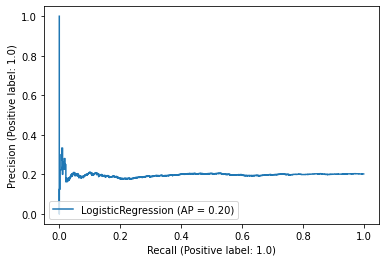

In [94]:
pipeline_classification.evaluate_test(best_model, X_test, y_test1, 0.5)

In [96]:
coeffs = pipeline_classification.get_important_attributes(X_train.columns, best_model)
coeffs

,predictor,coefficient,abs_coeffient
14,if_earn_more_about the same,-0.973984,0.973984
13,wealth_index_richest,-0.929166,0.929166
12,wealth_index_richer,-0.801109,0.801109
29,country_Nepal,-0.791826,0.791826
20,partner_ideal_child_both want same,-0.777822,0.777822
25,money_decide_person_respondent and husband/par...,-0.728807,0.728807
22,partner_ideal_child_husband wants more,-0.724609,0.724609
9,wealth_index_middle,-0.723828,0.723828
18,sex_head_household_female,-0.711105,0.711105
17,if_earn_more_more than him,-0.675836,0.675836


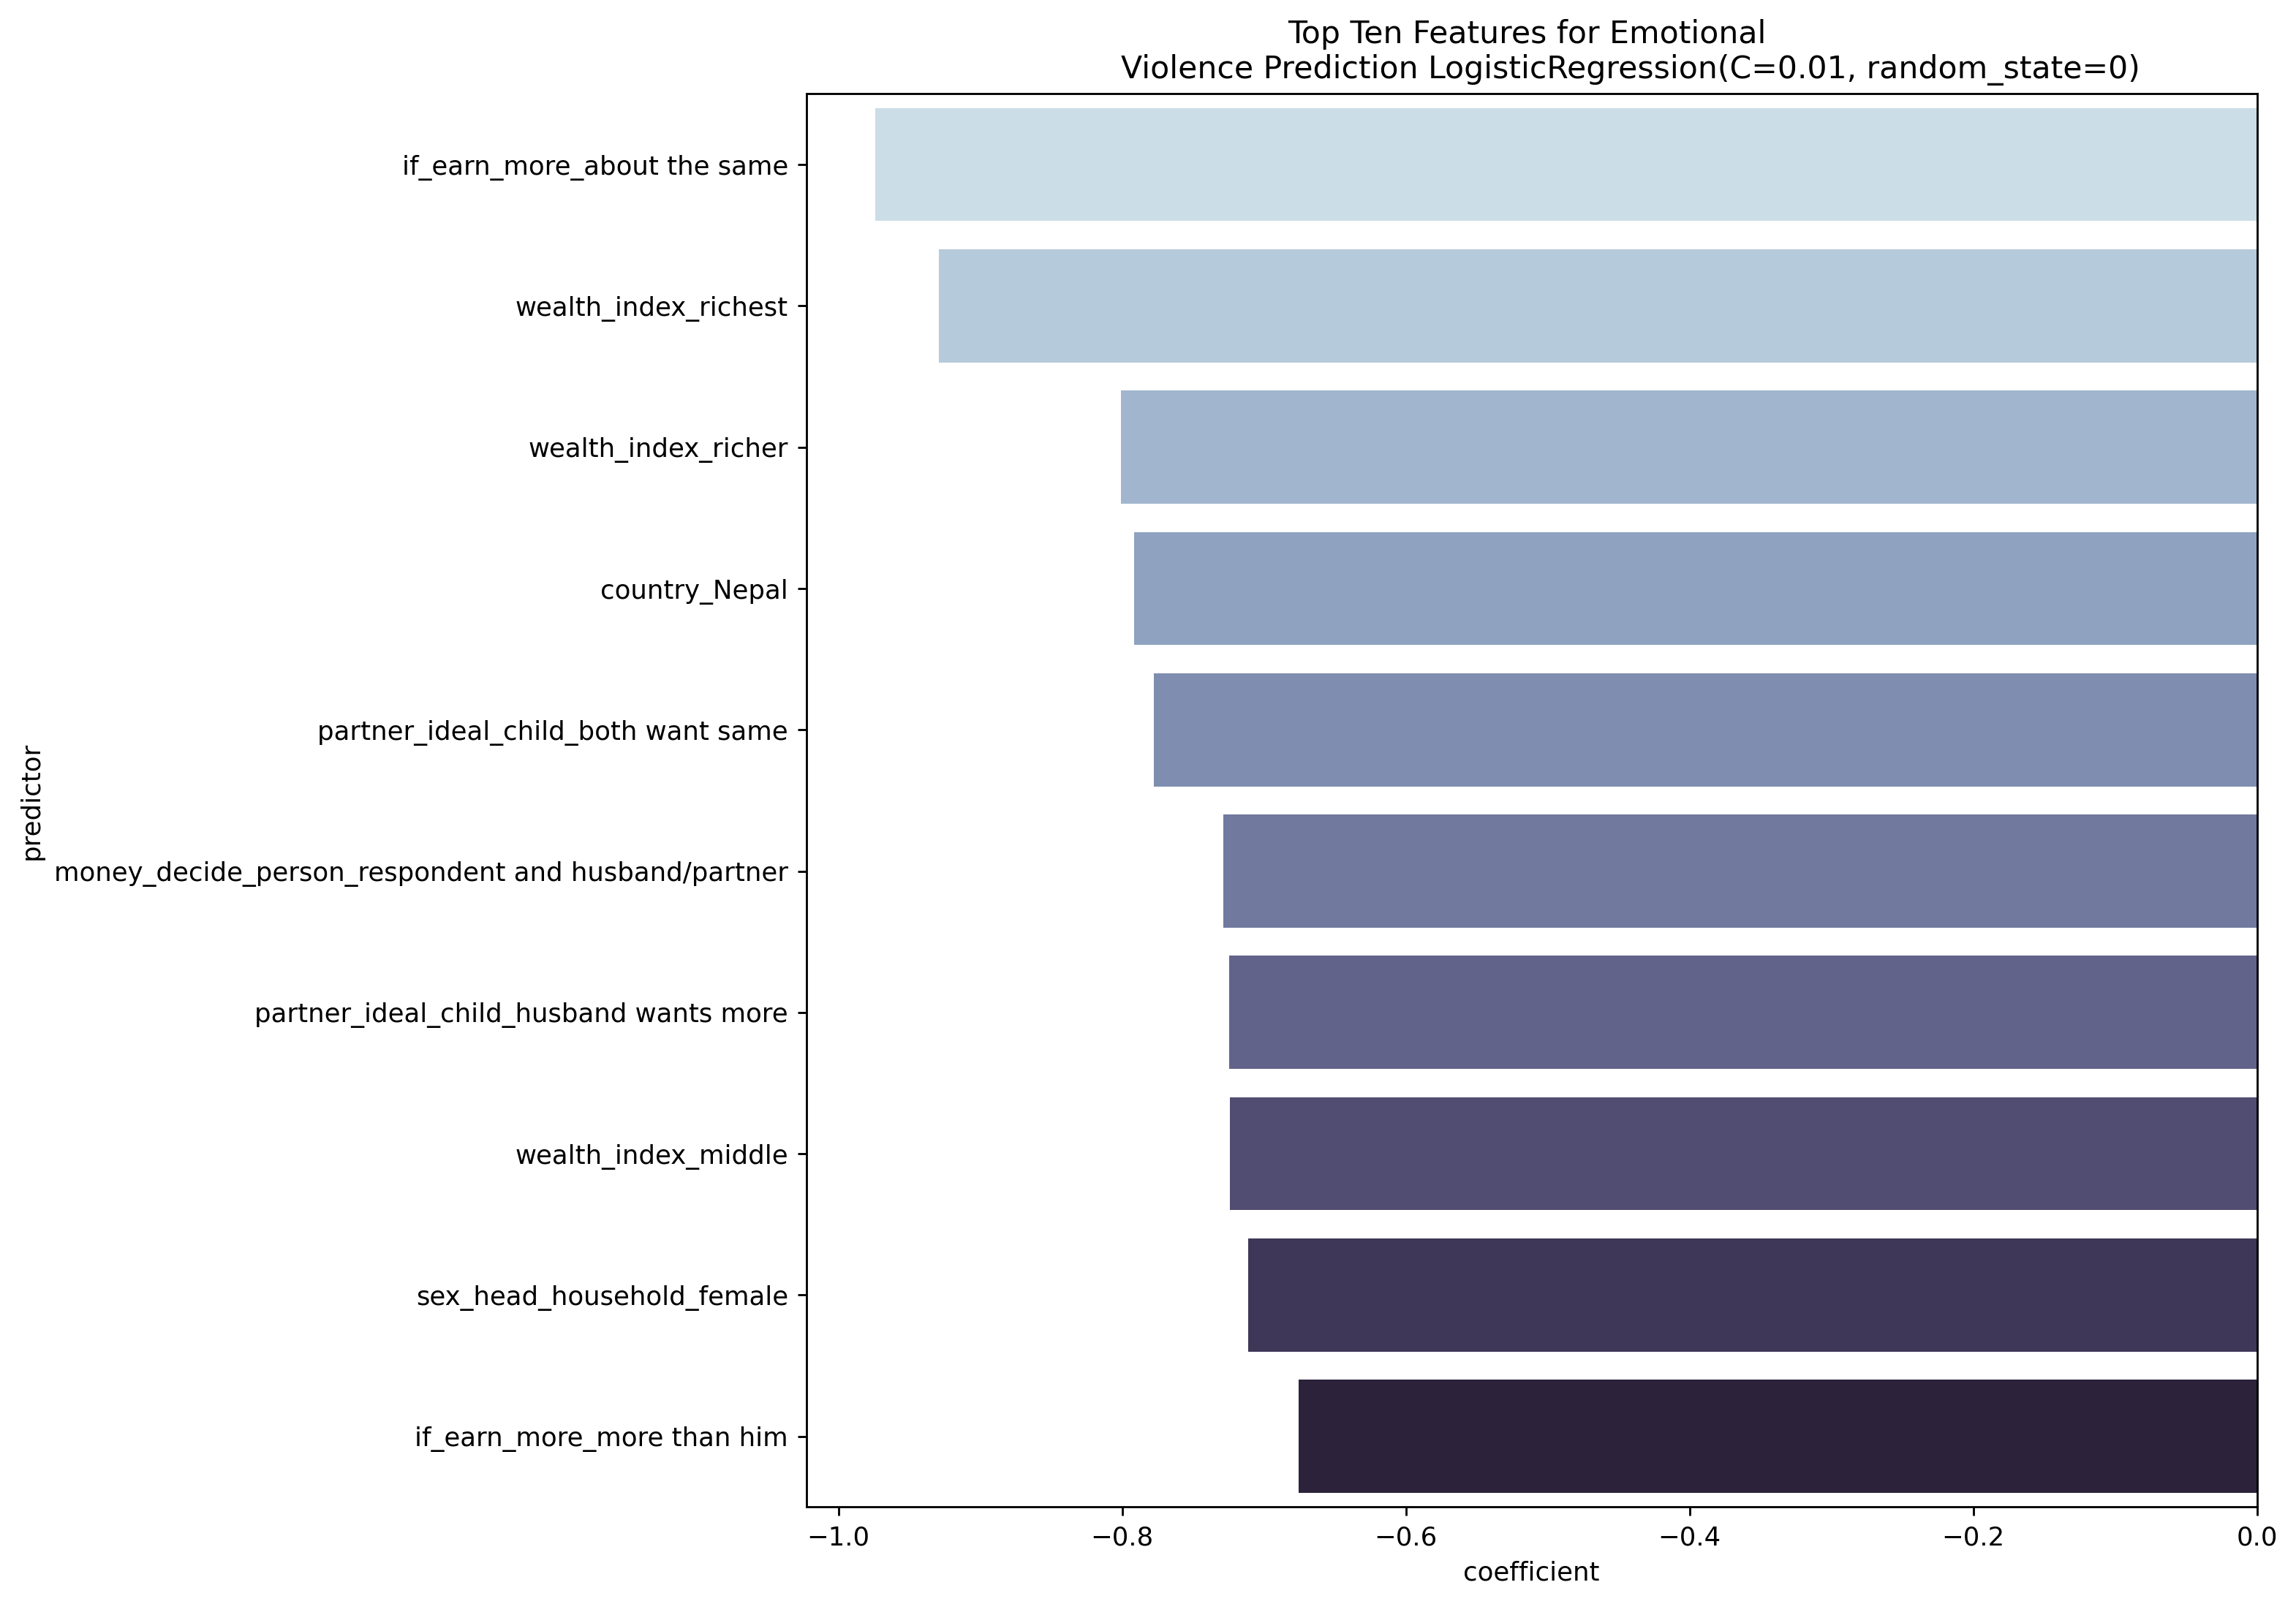

In [97]:
pipeline_classification.plot_top10_attributes(coeffs, best_model)

## Target 2: if have physical violence

In [99]:
# Use SMOTE to deal with inbalanced data

result, best_model = pipeline_classification.train_logistic_regression_SMOTE(X_train, y_train2,'All', 'if_phy_vio')

In [100]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_phy_vio,LogisticRegression,"{'logisticregression__C': 0.01, 'logisticregre...",0.282977,0.767322,0.232241,0.363090,0.664174
1,All,if_phy_vio,LogisticRegression,"{'logisticregression__C': 0.1, 'logisticregres...",0.224562,0.843971,0.304806,0.178845,0.654272
2,All,if_phy_vio,LogisticRegression,"{'logisticregression__C': 1, 'logisticregressi...",0.165025,0.859792,0.341502,0.109864,0.650554
3,All,if_phy_vio,LogisticRegression,"{'logisticregression__C': 10, 'logisticregress...",0.151207,0.859792,0.330005,0.099100,0.649410
4,All,if_phy_vio,LogisticRegression,"{'logisticregression__C': 100, 'logisticregres...",0.145892,0.859656,0.326883,0.094799,0.649302


In [101]:
best_model

LogisticRegression(C=0.01, random_state=0)

In [102]:
result1, best_model1 = pipeline_classification.train_logistic_regression(X_train, y_train2, 'All', 'if_phy_vio')

In [103]:
result1

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_phy_vio,LogisticRegression,"{'C': 0.01, 'penalty': 'l2'}",0.004255,0.873568,0.200000,0.002151,0.675577
1,All,if_phy_vio,LogisticRegression,"{'C': 0.1, 'penalty': 'l2'}",0.012633,0.873568,0.316667,0.006463,0.674768
2,All,if_phy_vio,LogisticRegression,"{'C': 1, 'penalty': 'l2'}",0.014693,0.873432,0.333333,0.007539,0.674138
3,All,if_phy_vio,LogisticRegression,"{'C': 10, 'penalty': 'l2'}",0.014693,0.873432,0.333333,0.007539,0.673481
4,All,if_phy_vio,LogisticRegression,"{'C': 100, 'penalty': 'l2'}",0.014693,0.873432,0.333333,0.007539,0.673400


In [104]:
best_model1

LogisticRegression(C=1, random_state=0)

In [106]:
pipeline_classification.evaluate_test(best_model, X_test, y_test2, 0.5)

{'f1': 0.28571428571428575,
 'accuracy': 0.544711014176663,
 'precision': 0.1821155943293348,
 'recall': 0.6626984126984127,
 'roc_auc': 0.594307487006602,
 'model_object': LogisticRegression(C=0.01, random_state=0)}

In [107]:
coeffs = pipeline_classification.get_important_attributes(X_train.columns, best_model)
coeffs

,predictor,coefficient,abs_coeffient
20,partner_ideal_child_both want same,-1.031115,1.031115
13,wealth_index_richest,-1.011025,1.011025
14,if_earn_more_about the same,-1.004885,1.004885
25,money_decide_person_respondent and husband/par...,-0.989633,0.989633
12,wealth_index_richer,-0.941920,0.941920
18,sex_head_household_female,-0.840583,0.840583
9,wealth_index_middle,-0.814653,0.814653
22,partner_ideal_child_husband wants more,-0.814487,0.814487
10,wealth_index_poorer,-0.808649,0.808649
21,partner_ideal_child_husband wants fewer,-0.733161,0.733161


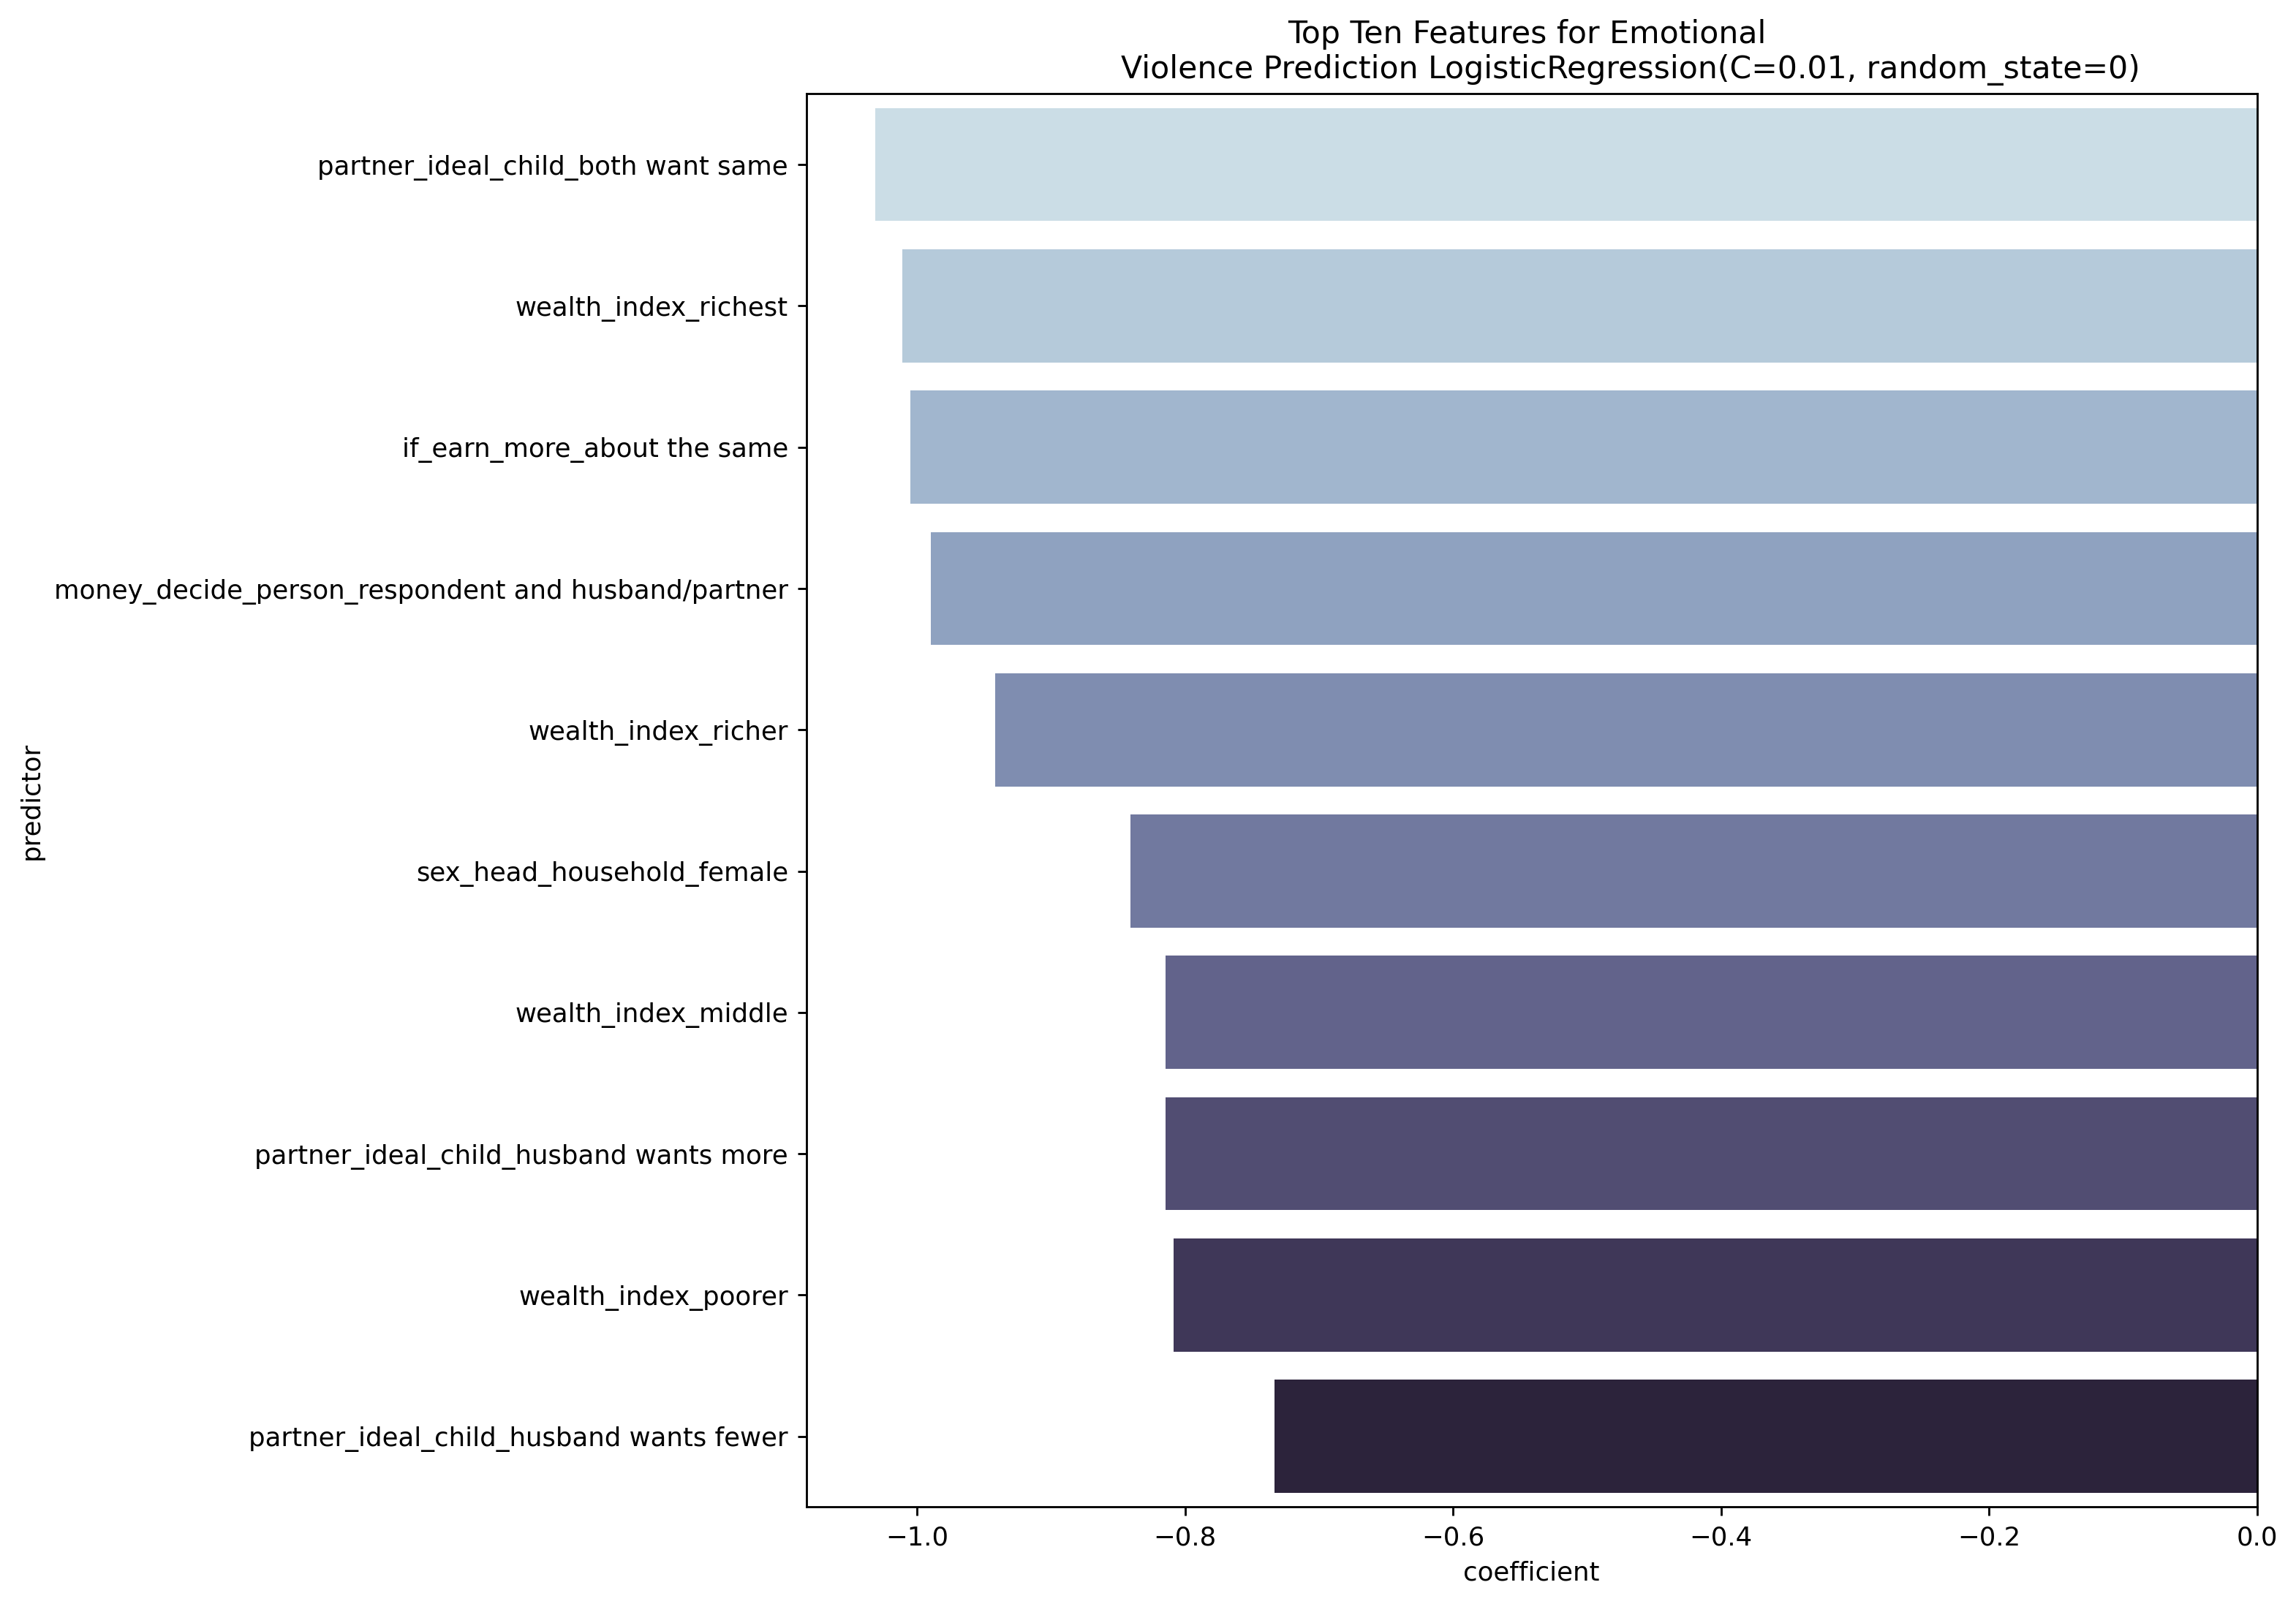

In [108]:
pipeline_classification.plot_top10_attributes(coeffs, best_model)

## Target 3: if have sexual violence

In [109]:
# Use SMOTE to deal with inbalanced data

result, best_model = pipeline_classification.train_logistic_regression_SMOTE(X_train, y_train3, 'All', 'if_sex_vio')

In [110]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_sex_vio,LogisticRegression,"{'logisticregression__C': 0.01, 'logisticregre...",0.141083,0.898388,0.105734,0.215148,0.671449
1,All,if_sex_vio,LogisticRegression,"{'logisticregression__C': 0.1, 'logisticregres...",0.071896,0.951172,0.140167,0.048645,0.655593
2,All,if_sex_vio,LogisticRegression,"{'logisticregression__C': 1, 'logisticregressi...",0.036062,0.957310,0.153333,0.020813,0.646600
3,All,if_sex_vio,LogisticRegression,"{'logisticregression__C': 10, 'logisticregress...",0.030001,0.957037,0.128333,0.017365,0.640685
4,All,if_sex_vio,LogisticRegression,"{'logisticregression__C': 100, 'logisticregres...",0.036062,0.957583,0.153333,0.020813,0.640405


In [111]:
best_model

LogisticRegression(C=0.01, random_state=0)

In [112]:
result1, best_model1 = pipeline_classification.train_logistic_regression(X_train, y_train3, 'All', 'if_sex_vio')

In [113]:
result1

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_sex_vio,LogisticRegression,"{'C': 0.01, 'penalty': 'l2'}",0.0,0.96072,0.0,0.0,0.691227
1,All,if_sex_vio,LogisticRegression,"{'C': 0.1, 'penalty': 'l2'}",0.0,0.96072,0.0,0.0,0.693136
2,All,if_sex_vio,LogisticRegression,"{'C': 1, 'penalty': 'l2'}",0.0,0.96072,0.0,0.0,0.692227
3,All,if_sex_vio,LogisticRegression,"{'C': 10, 'penalty': 'l2'}",0.0,0.96072,0.0,0.0,0.692038
4,All,if_sex_vio,LogisticRegression,"{'C': 100, 'penalty': 'l2'}",0.0,0.96072,0.0,0.0,0.692044


In [114]:
best_model1

LogisticRegression(C=0.01, random_state=0)

In [115]:
pipeline_classification.evaluate_test(best_model, X_test, y_test3, 0.5)

{'f1': 0.118,
 'accuracy': 0.5190839694656488,
 'precision': 0.064340239912759,
 'recall': 0.7108433734939759,
 'roc_auc': 0.6104188312358514,
 'model_object': LogisticRegression(C=0.01, random_state=0)}

In [116]:
coeffs = pipeline_classification.get_important_attributes(X_train.columns, best_model)
coeffs

,predictor,coefficient,abs_coeffient
20,partner_ideal_child_both want same,-1.306818,1.306818
14,if_earn_more_about the same,-1.301182,1.301182
25,money_decide_person_respondent and husband/par...,-1.268047,1.268047
13,wealth_index_richest,-1.190730,1.190730
28,country_Maldives,-1.184997,1.184997
12,wealth_index_richer,-1.169614,1.169614
9,wealth_index_middle,-1.112968,1.112968
21,partner_ideal_child_husband wants fewer,-1.092709,1.092709
8,if_urban_urban,-1.089659,1.089659
11,wealth_index_poorest,-1.059429,1.059429


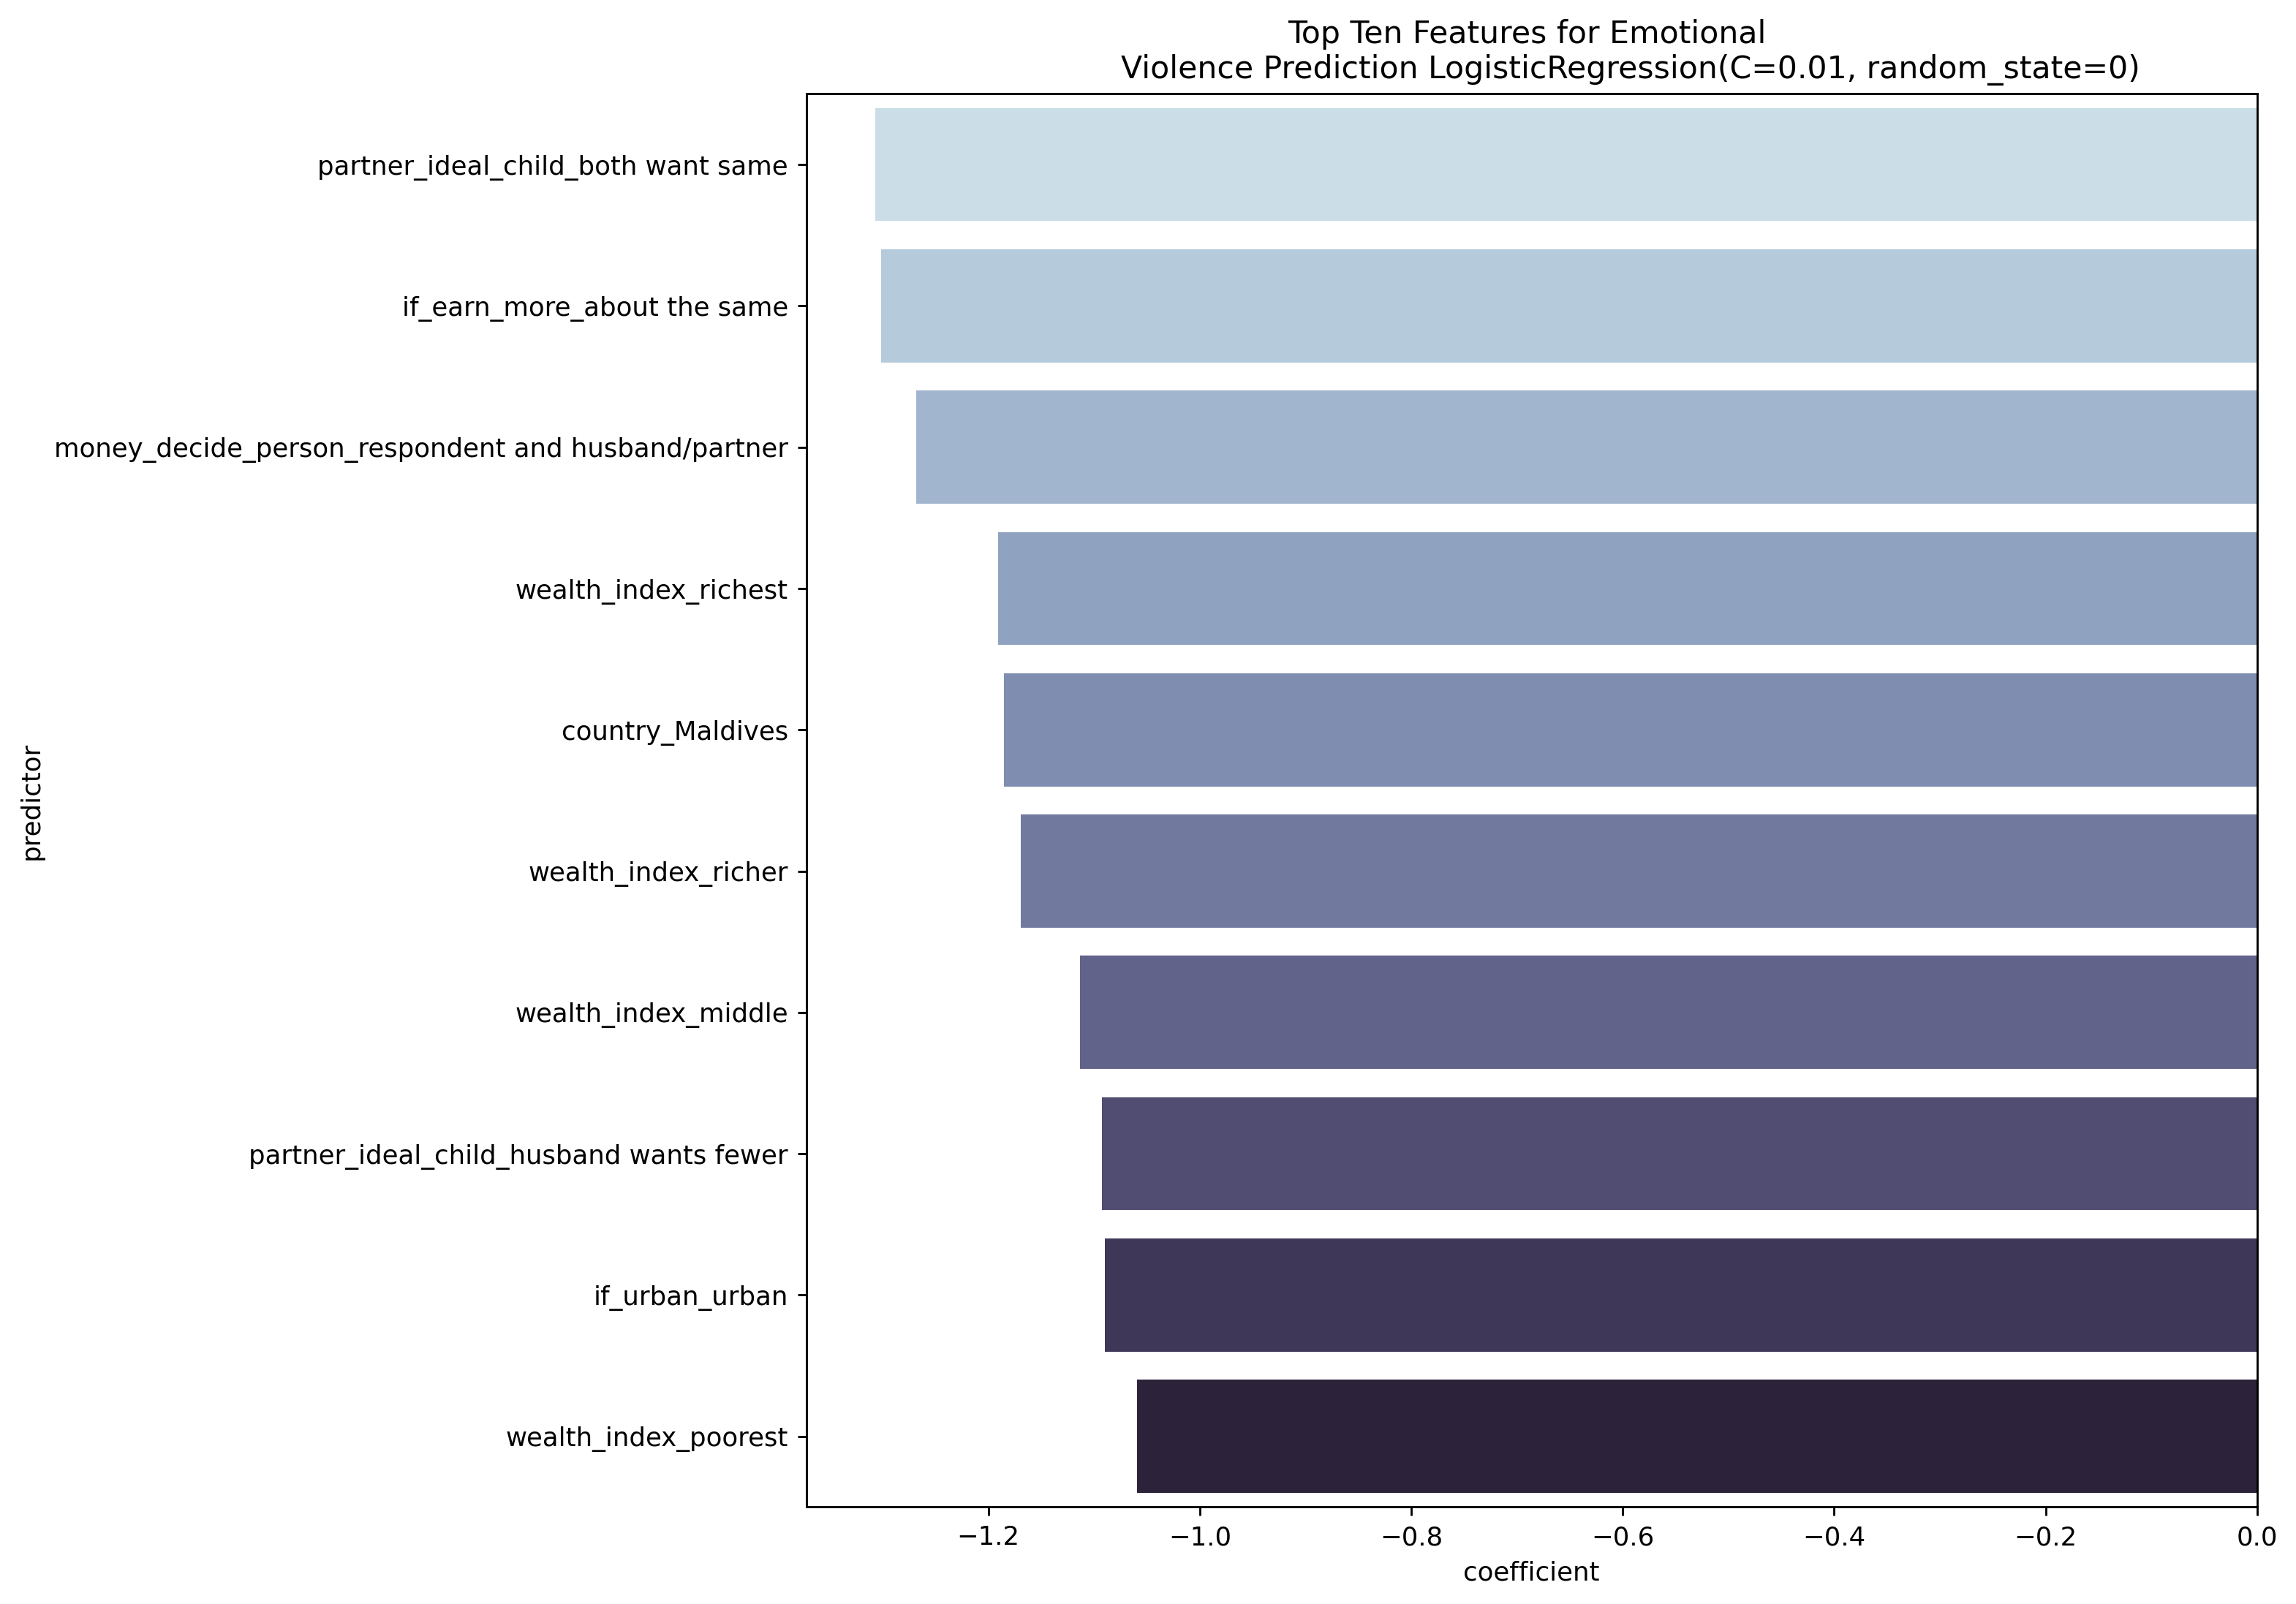

In [117]:
pipeline_classification.plot_top10_attributes(coeffs, best_model)

# Target 4: if have violence

In [118]:
# Use SMOTE to deal with inbalanced data

result, best_model = pipeline_classification.train_logistic_regression_SMOTE(X_train, y_train4, 'All', 'if_vio')

In [119]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_vio,LogisticRegression,"{'logisticregression__C': 0.01, 'logisticregre...",0.405476,0.669121,0.356860,0.469886,0.642392
1,All,if_vio,LogisticRegression,"{'logisticregression__C': 0.1, 'logisticregres...",0.313716,0.714264,0.371430,0.272159,0.634936
2,All,if_vio,LogisticRegression,"{'logisticregression__C': 1, 'logisticregressi...",0.252651,0.732679,0.386305,0.188636,0.632903
3,All,if_vio,LogisticRegression,"{'logisticregression__C': 10, 'logisticregress...",0.235569,0.733361,0.380008,0.171591,0.632504
4,All,if_vio,LogisticRegression,"{'logisticregression__C': 100, 'logisticregres...",0.234425,0.733361,0.378800,0.170455,0.632136


In [120]:
best_model

LogisticRegression(C=0.01, random_state=0)

In [121]:
pipeline_classification.evaluate_test(best_model, X_test, y_test4, 0.5)

{'f1': 0.41329479768786126,
 'accuracy': 0.5572519083969466,
 'precision': 0.311886586695747,
 'recall': 0.6124197002141327,
 'roc_auc': 0.5754124836110898,
 'model_object': LogisticRegression(C=0.01, random_state=0)}

In [124]:
coeffs = pipeline_classification.get_important_attributes(X_train.columns, best_model)
coeffs

,predictor,coefficient,abs_coeffient
14,if_earn_more_about the same,-0.856830,0.856830
13,wealth_index_richest,-0.769284,0.769284
20,partner_ideal_child_both want same,-0.756609,0.756609
12,wealth_index_richer,-0.643705,0.643705
25,money_decide_person_respondent and husband/par...,-0.617113,0.617113
18,sex_head_household_female,-0.613481,0.613481
22,partner_ideal_child_husband wants more,-0.590289,0.590289
9,wealth_index_middle,-0.561150,0.561150
17,if_earn_more_more than him,-0.524017,0.524017
8,if_urban_urban,-0.501790,0.501790


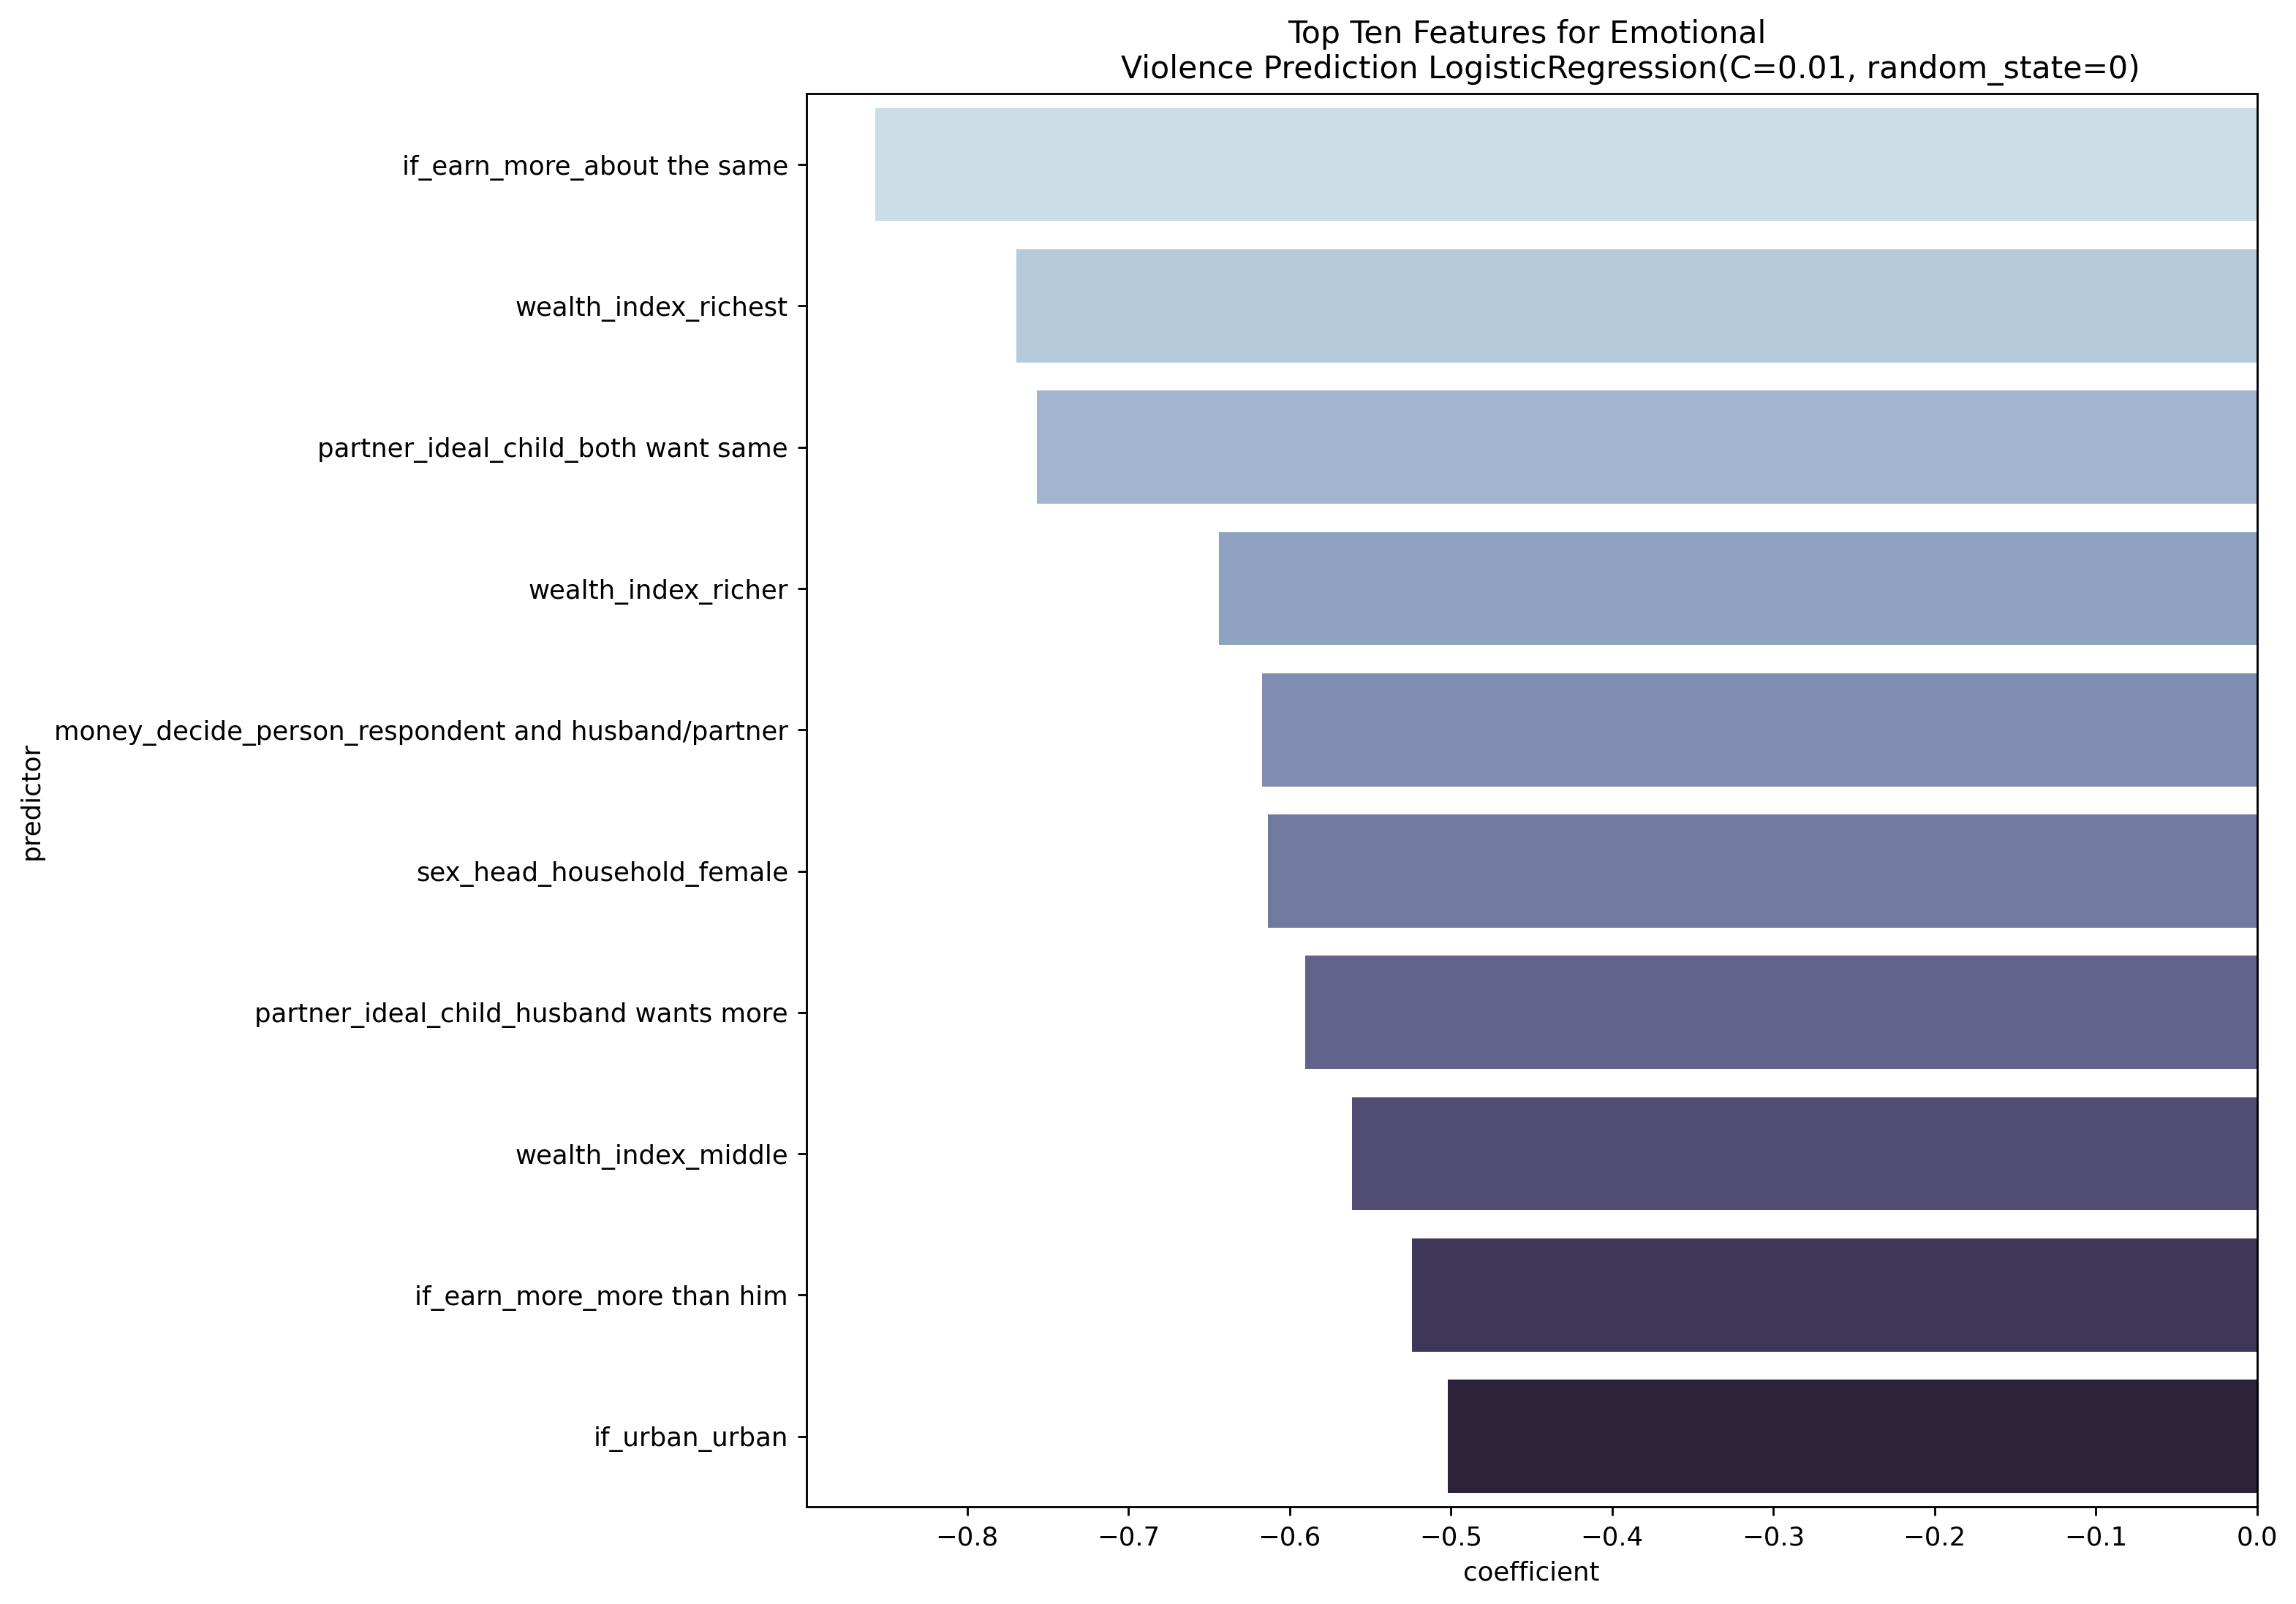

In [125]:
pipeline_classification.plot_top10_attributes(coeffs, best_model)

# Analyze Cambodia

In [132]:
X_train, X_test, y_train, y_test = pipeline_classification.prepare_data_contry\
                                  (df_Cambodia, features_col, target_col, dummy, need_one_hot, need_normalize)

y_train1, y_train2, y_train3, y_train4, y_test1, y_test2, y_test3, y_test4 = \
                                    pipeline_classification.name_target(y_train, y_test)

## Target 1: if have emotional violence

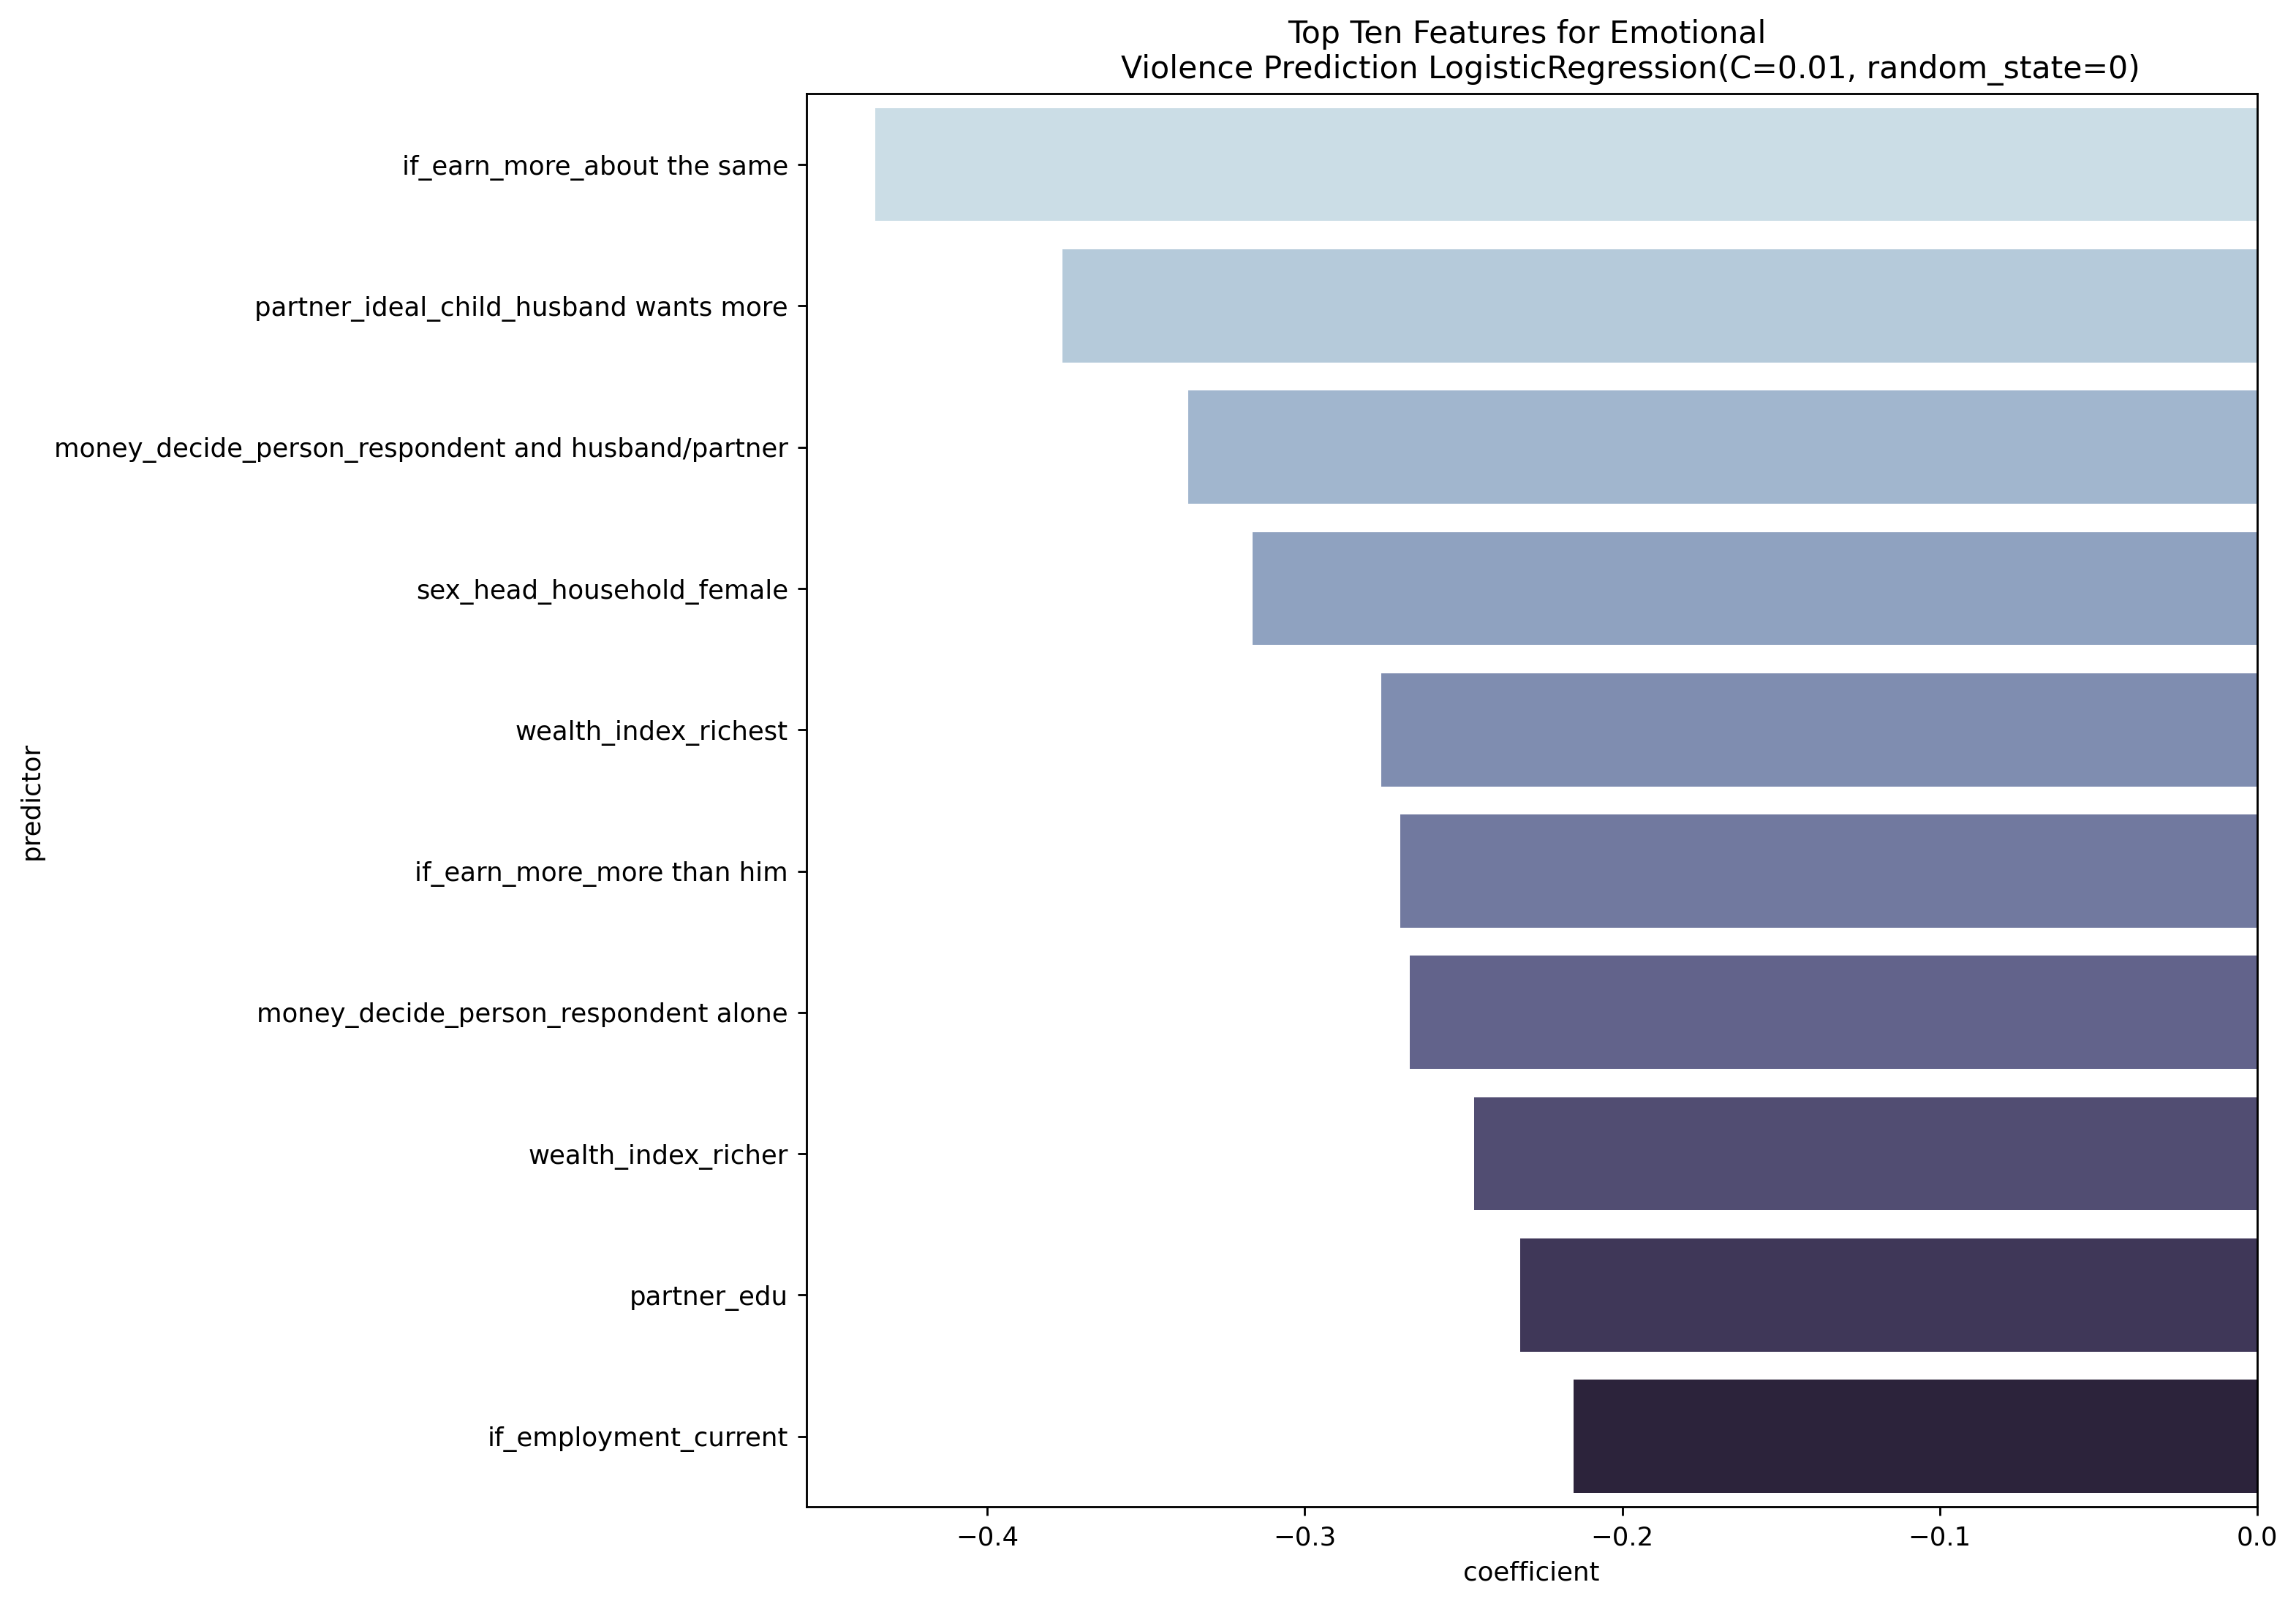

In [137]:
result, eval, coeffs = pipeline_classification.analyze_country\
    (X_train, X_test, y_train1, y_test1, 'Cambodia', 'if_emo_vil', 0.5)

In [138]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,Cambodia,if_emo_vil,LogisticRegression,"{'logisticregression__C': 0.01, 'logisticregre...",0.366816,0.637190,0.283182,0.523173,0.635470
1,Cambodia,if_emo_vil,LogisticRegression,"{'logisticregression__C': 0.1, 'logisticregres...",0.322127,0.702231,0.301057,0.348663,0.626975
2,Cambodia,if_emo_vil,LogisticRegression,"{'logisticregression__C': 1, 'logisticregressi...",0.254791,0.752388,0.329850,0.209804,0.617242
3,Cambodia,if_emo_vil,LogisticRegression,"{'logisticregression__C': 10, 'logisticregress...",0.238750,0.763113,0.339345,0.186096,0.615981
4,Cambodia,if_emo_vil,LogisticRegression,"{'logisticregression__C': 100, 'logisticregres...",0.226955,0.762525,0.330799,0.174332,0.616420


In [139]:
eval

{'f1': 0.31272727272727274,
 'accuracy': 0.548926014319809,
 'precision': 0.20574162679425836,
 'recall': 0.6515151515151515,
 'roc_auc': 0.5906300970040346,
 'model_object': LogisticRegression(C=0.01, random_state=0)}

In [141]:
coeffs[:10]

,predictor,coefficient,abs_coeffient
14,if_earn_more_about the same,-0.435270,0.435270
22,partner_ideal_child_husband wants more,-0.376337,0.376337
25,money_decide_person_respondent and husband/par...,-0.336790,0.336790
18,sex_head_household_female,-0.316429,0.316429
13,wealth_index_richest,-0.275801,0.275801
17,if_earn_more_more than him,-0.269824,0.269824
24,money_decide_person_respondent alone,-0.266969,0.266969
12,wealth_index_richer,-0.246558,0.246558
4,partner_edu,-0.232224,0.232224
6,if_employment_current,-0.215259,0.215259


## Target 2: if have physical violence

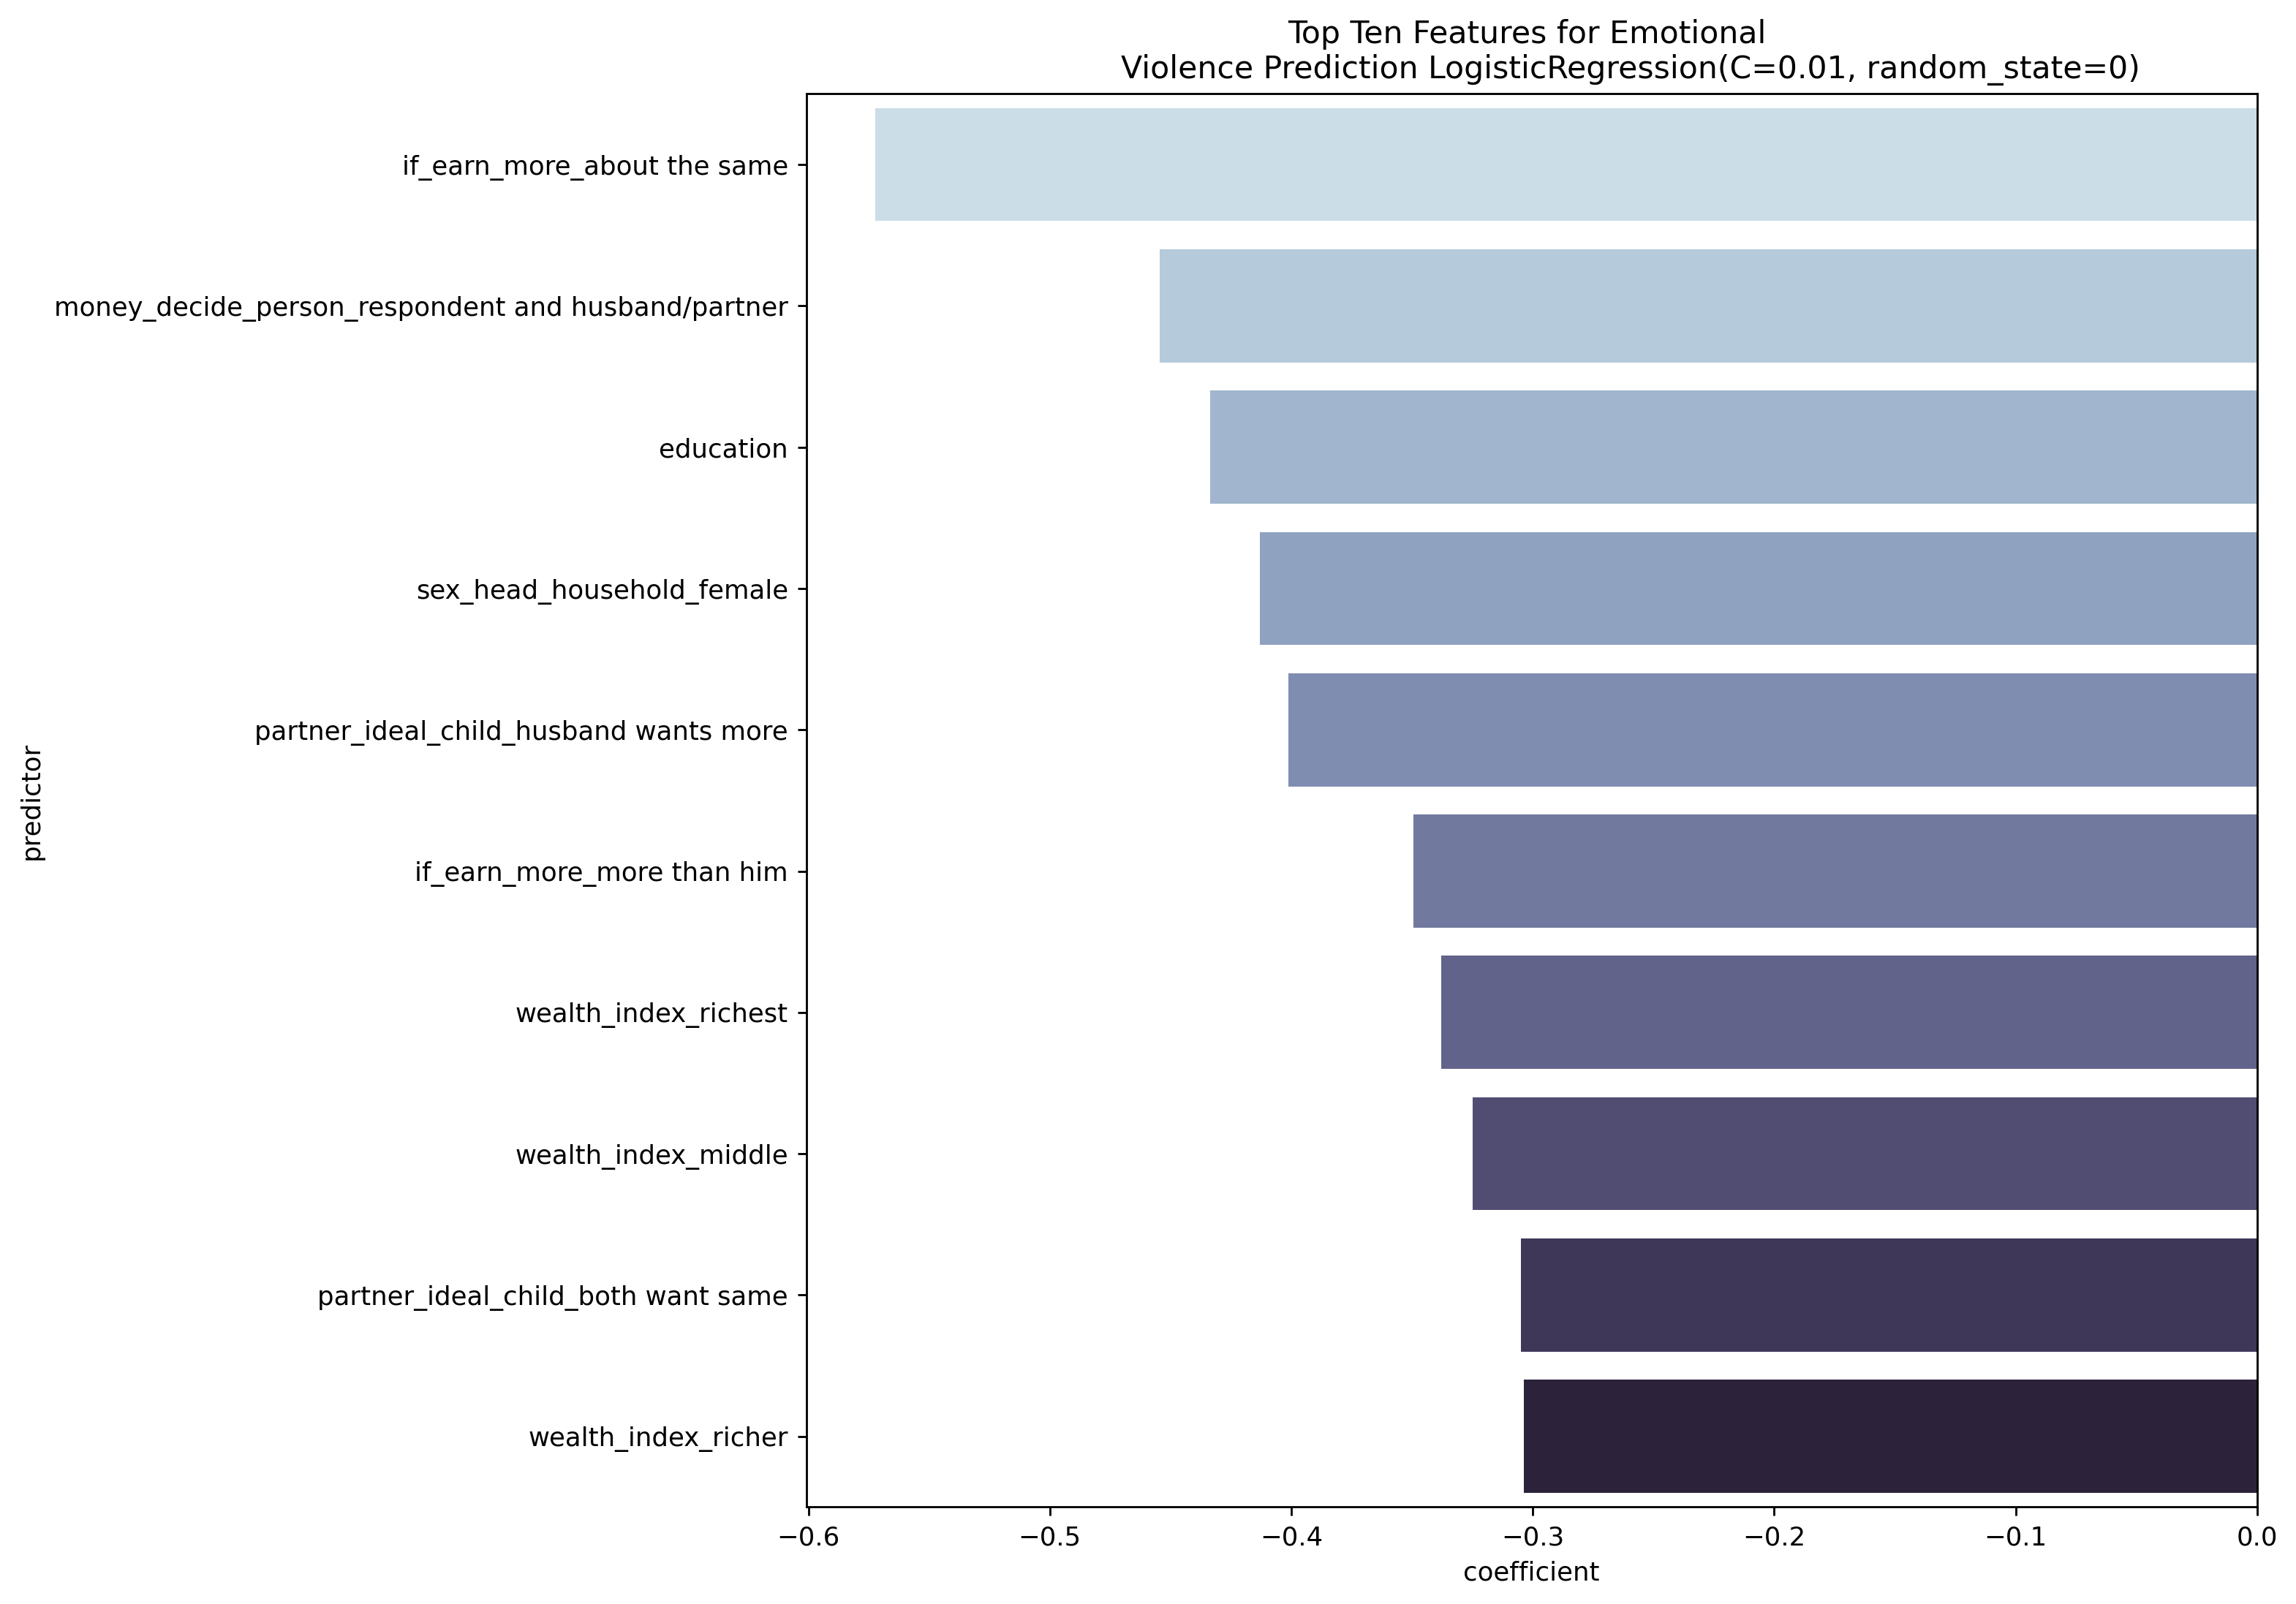

In [143]:
result, eval, coeffs = pipeline_classification.analyze_country\
    (X_train, X_test, y_train2, y_test2, 'Cambodia', 'if_phy_vil', 0.5)

In [144]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,Cambodia,if_phy_vil,LogisticRegression,"{'logisticregression__C': 0.01, 'logisticregre...",0.290338,0.671225,0.203262,0.511472,0.656373
1,Cambodia,if_phy_vil,LogisticRegression,"{'logisticregression__C': 0.1, 'logisticregres...",0.244585,0.754748,0.208289,0.301082,0.643347
2,Cambodia,if_phy_vil,LogisticRegression,"{'logisticregression__C': 1, 'logisticregressi...",0.229782,0.815608,0.260377,0.209740,0.634651
3,Cambodia,if_phy_vil,LogisticRegression,"{'logisticregression__C': 10, 'logisticregress...",0.207232,0.823385,0.264729,0.173377,0.630489
4,Cambodia,if_phy_vil,LogisticRegression,"{'logisticregression__C': 100, 'logisticregres...",0.197748,0.824579,0.255688,0.164286,0.630133


In [145]:
eval

{'f1': 0.2957198443579767,
 'accuracy': 0.568019093078759,
 'precision': 0.18181818181818182,
 'recall': 0.7916666666666666,
 'roc_auc': 0.6653751123090745,
 'model_object': LogisticRegression(C=0.01, random_state=0)}

In [146]:
coeffs[:10]

,predictor,coefficient,abs_coeffient
14,if_earn_more_about the same,-0.572247,0.572247
25,money_decide_person_respondent and husband/par...,-0.454613,0.454613
1,education,-0.433722,0.433722
18,sex_head_household_female,-0.413129,0.413129
22,partner_ideal_child_husband wants more,-0.401132,0.401132
17,if_earn_more_more than him,-0.349320,0.349320
13,wealth_index_richest,-0.337879,0.337879
9,wealth_index_middle,-0.324889,0.324889
20,partner_ideal_child_both want same,-0.304944,0.304944
12,wealth_index_richer,-0.303821,0.303821


## Target 3: if have sexual violence

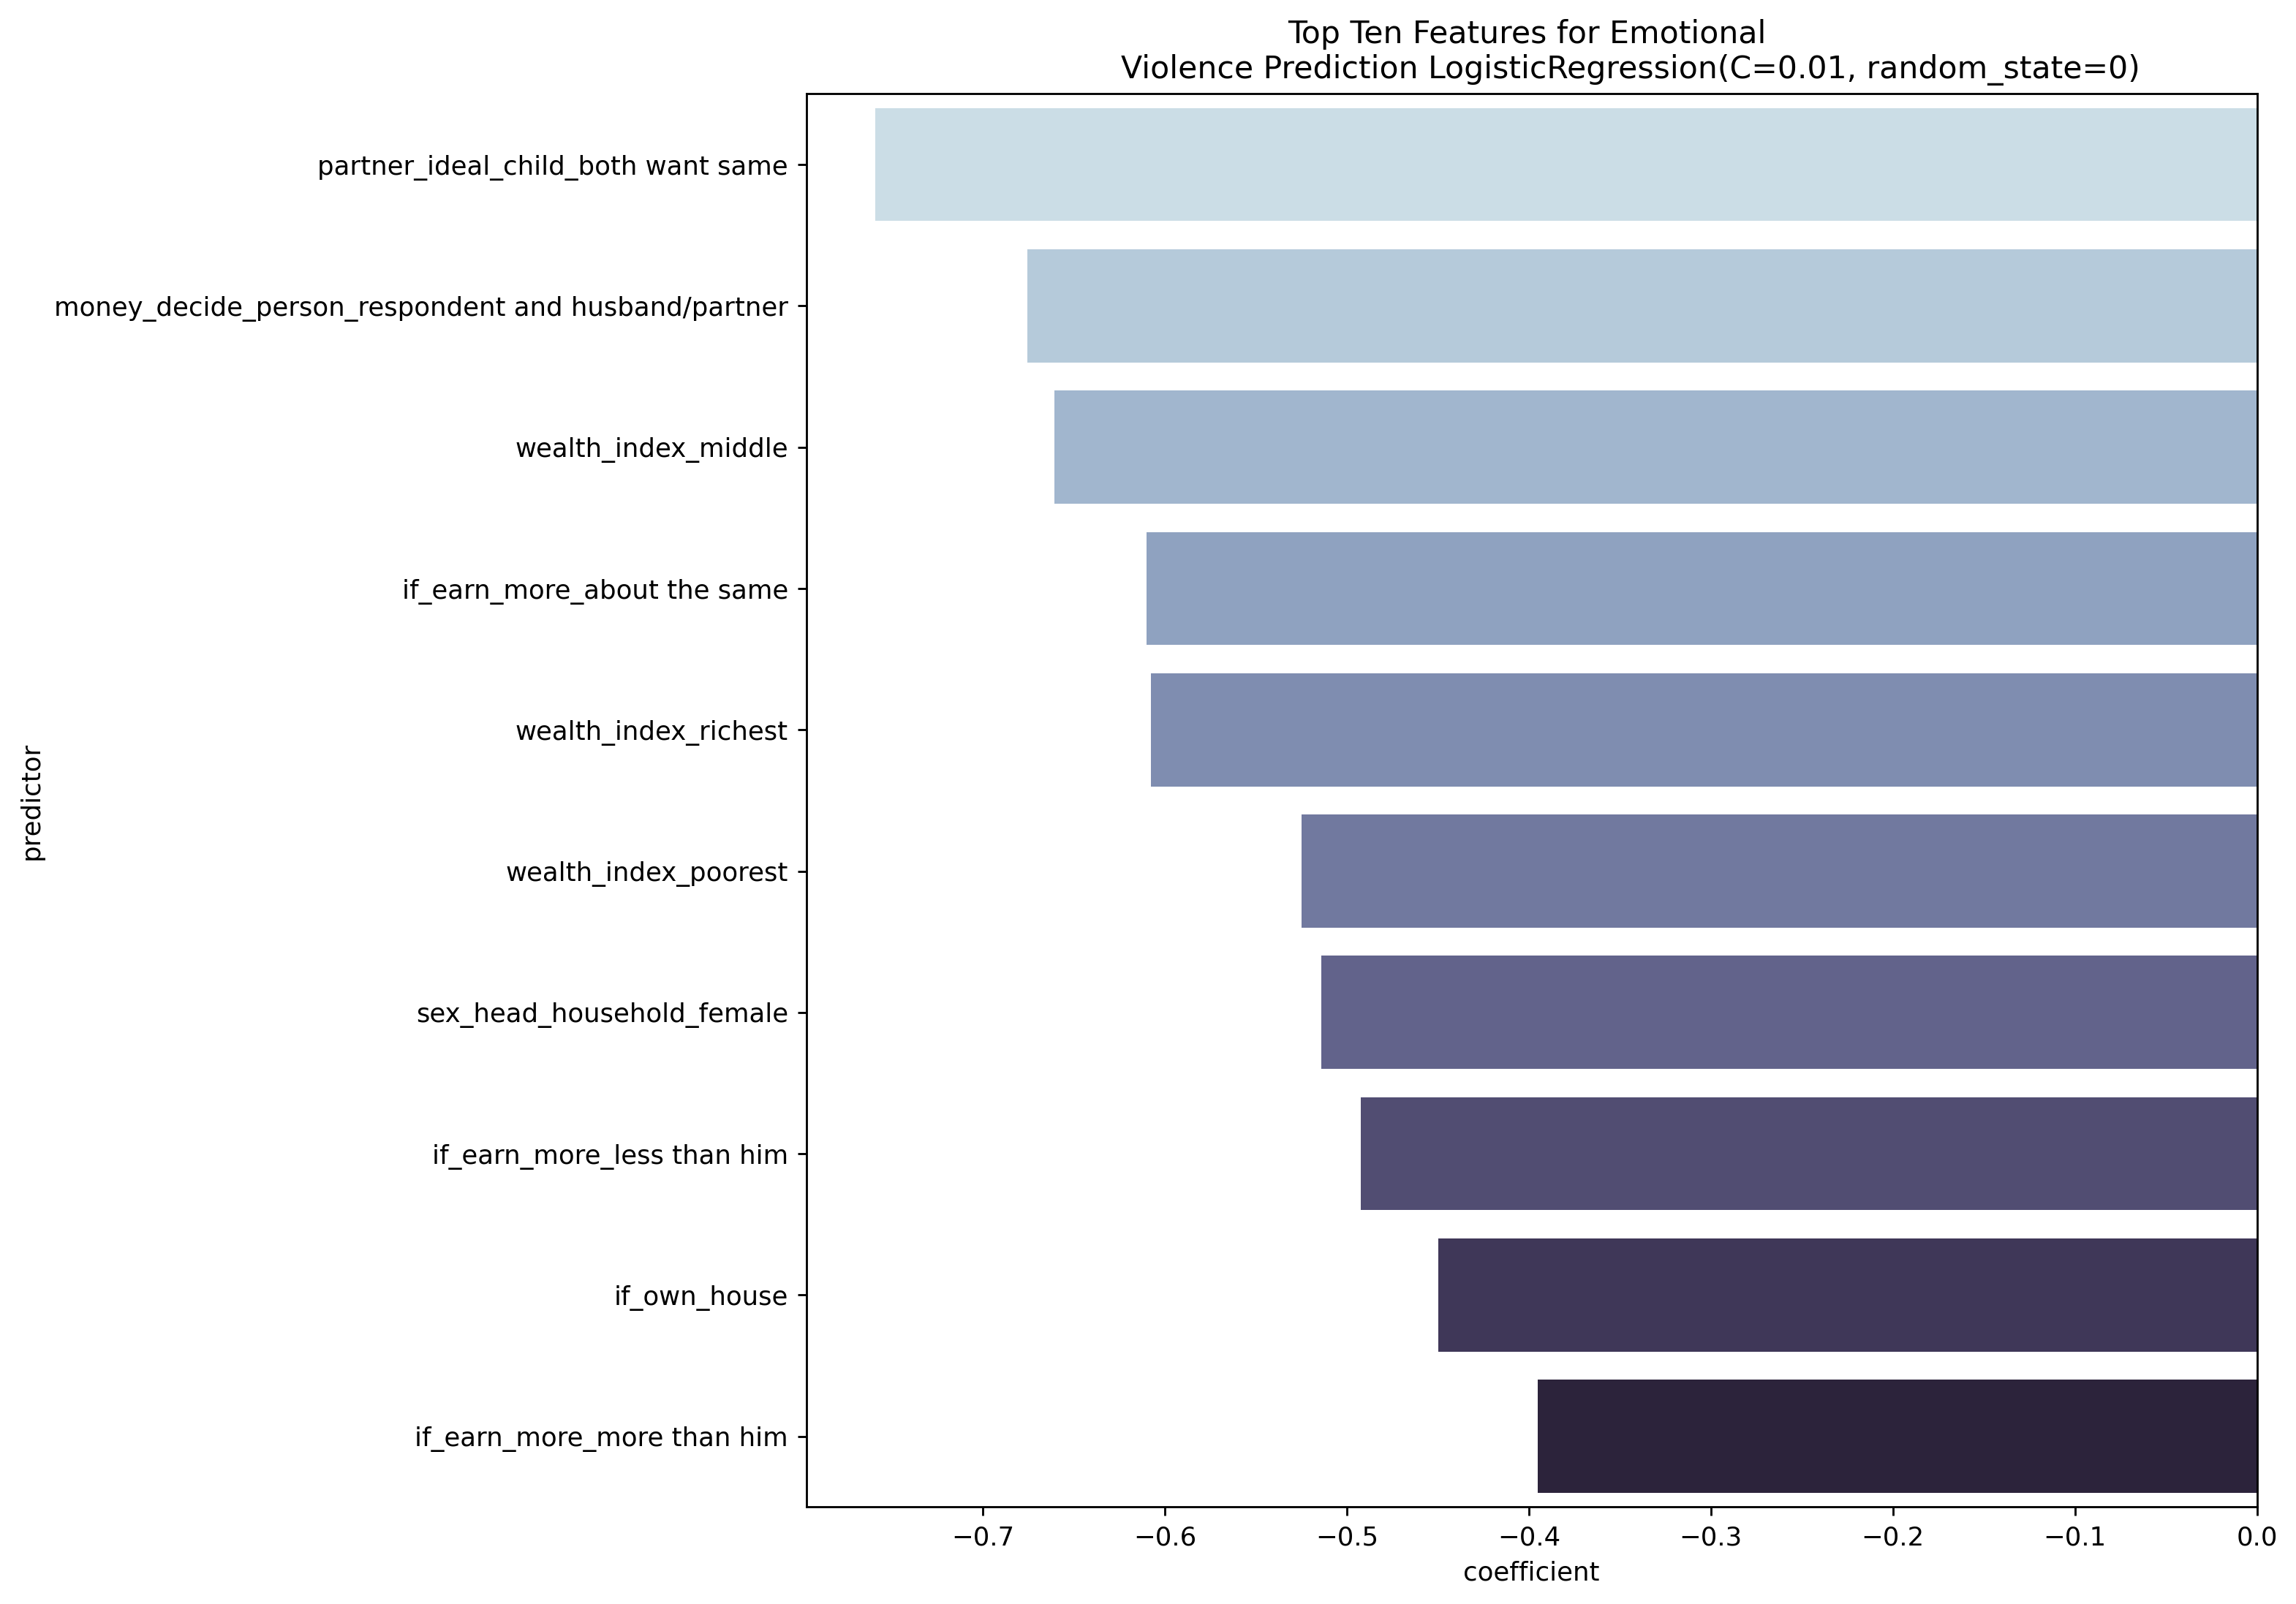

In [147]:
result, eval, coeffs = pipeline_classification.analyze_country\
    (X_train, X_test, y_train3, y_test3, 'Cambodia', 'if_sex_vio', 0.5)

## Target 4: if have violence

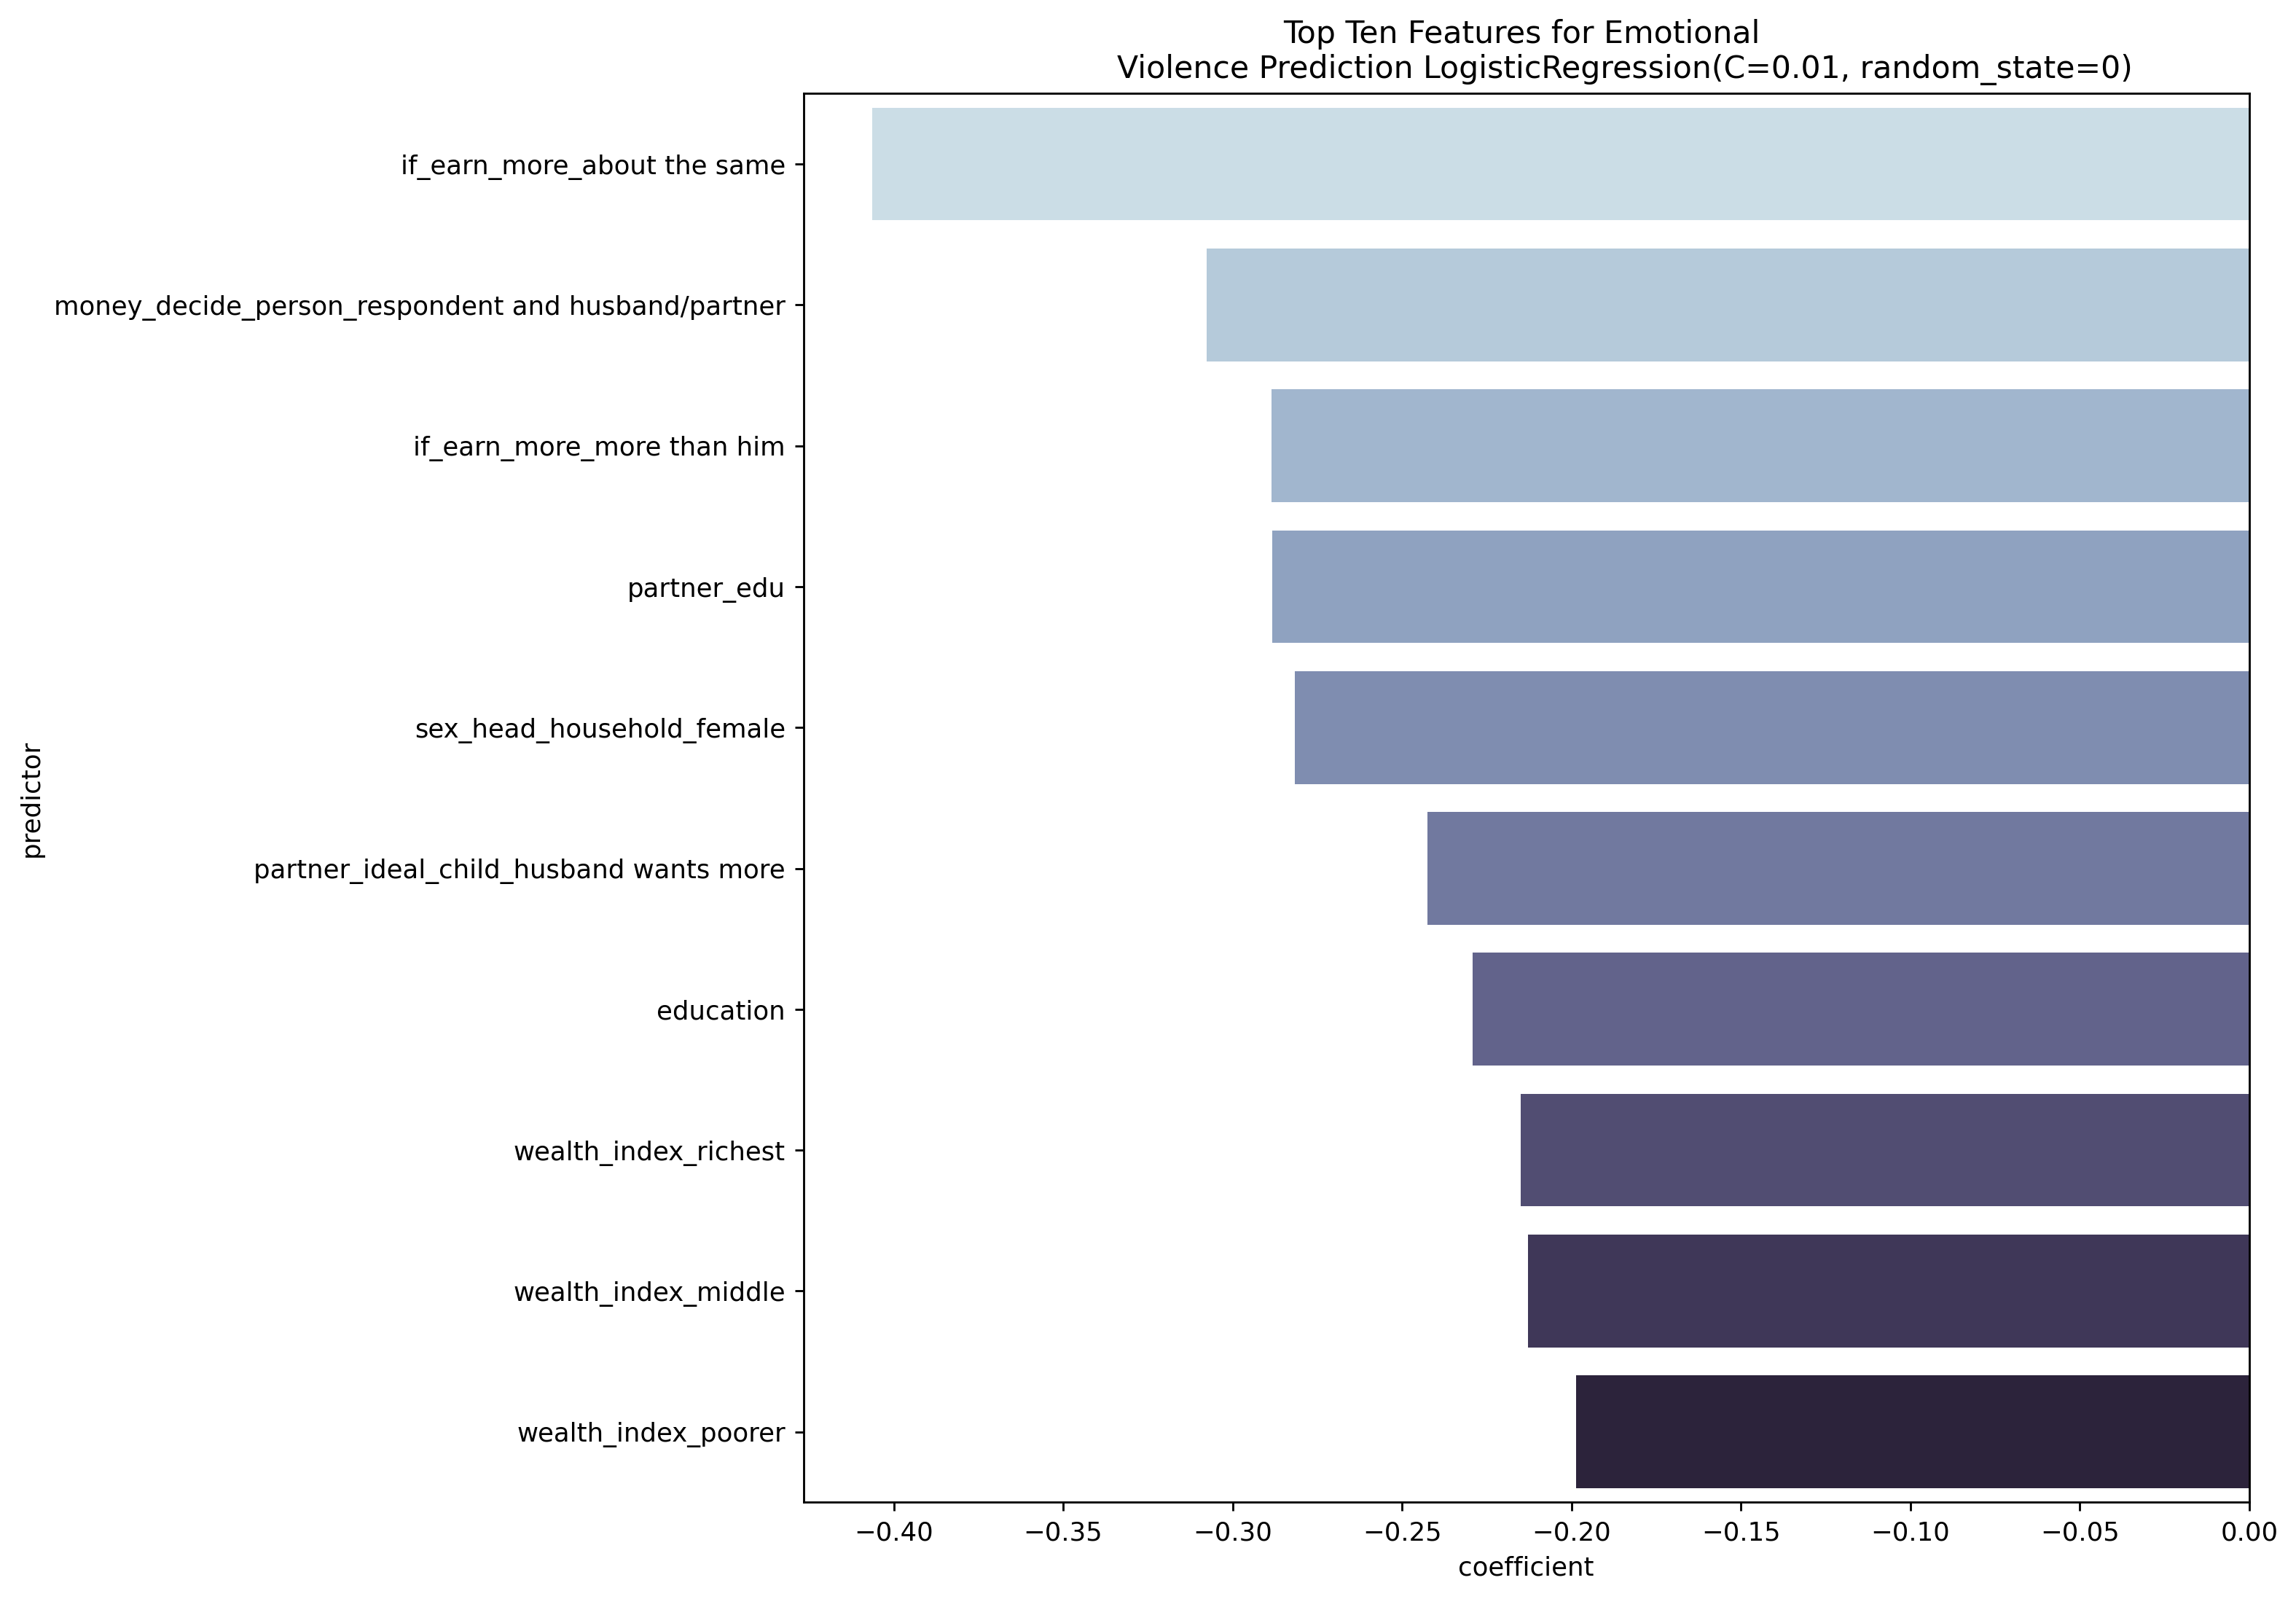

In [148]:
result, eval, coeffs = pipeline_classification.analyze_country\
    (X_train, X_test, y_train4, y_test4, 'Cambodia', 'if_sex_vio', 0.5)

# Analyze all countries by GaussianNB

In [163]:
X_train, X_test, y_train, y_test = pipeline_classification.prepare_data_contry\
        (df, features_col, target_col, dummy, need_one_hot, need_normalize, True)

In [164]:
y_train1, y_train2, y_train3, y_train4, y_test1, y_test2, y_test3, y_test4=\
        pipeline_classification.name_target(y_train, y_test)

## Target 1: if have emotional violence

In [171]:
result, eval = pipeline_classification.analyze_country\
    (X_train, X_test, y_train1, y_test1, 'All', 'if_emo_vil', 0.5, 'NB')

In [172]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_emo_vil,GaussianNB,{},0.339217,0.435347,0.220447,0.745258,0.589473


In [173]:
eval

{'f1': 0.27484472049689446,
 'accuracy': 0.49073064340239914,
 'precision': 0.193020719738277,
 'recall': 0.477088948787062,
 'roc_auc': 0.48563948464643597,
 'model_object': GaussianNB()}

## Target 2: if have physical violence

In [176]:
result, eval = pipeline_classification.analyze_country\
    (X_train, X_test, y_train2, y_test2, 'All', 'if_phy_vil', 0.5, 'NB')

In [177]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_phy_vil,GaussianNB,{},0.24571,0.4378,0.148688,0.719799,0.601677


In [178]:
eval

{'f1': 0.21043627031650983,
 'accuracy': 0.4967284623773173,
 'precision': 0.1341330425299891,
 'recall': 0.4880952380952381,
 'roc_auc': 0.49309945217024864,
 'model_object': GaussianNB()}

## Target 3: if have sexual violence

In [175]:
result, eval = pipeline_classification.analyze_country\
    (X_train, X_test, y_train3, y_test3, 'All', 'if_sex_vil', 0.5, 'NB')

In [179]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_phy_vil,GaussianNB,{},0.24571,0.4378,0.148688,0.719799,0.601677


In [180]:
eval

{'f1': 0.21043627031650983,
 'accuracy': 0.4967284623773173,
 'precision': 0.1341330425299891,
 'recall': 0.4880952380952381,
 'roc_auc': 0.49309945217024864,
 'model_object': GaussianNB()}

## Target 4: if have violence

In [181]:
result, eval = pipeline_classification.analyze_country\
    (X_train, X_test, y_train4, y_test4, 'All', 'if_vil', 0.5, 'NB')

In [182]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_vil,GaussianNB,{},0.403151,0.479542,0.278276,0.732386,0.604098


In [183]:
eval

{'f1': 0.32947976878612717,
 'accuracy': 0.4940021810250818,
 'precision': 0.24863685932388221,
 'recall': 0.48822269807280516,
 'roc_auc': 0.4920996445740764,
 'model_object': GaussianNB()}

# Analyze all countries by LinearSVC

In [184]:
X_train, X_test, y_train, y_test = pipeline_classification.prepare_data_contry\
        (df, features_col, target_col, dummy, need_one_hot, need_normalize, all=True)

In [185]:
y_train1, y_train2, y_train3, y_train4, y_test1, y_test2, y_test3, y_test4=\
        pipeline_classification.name_target(y_train, y_test)

## Target 1: if have emotional violence

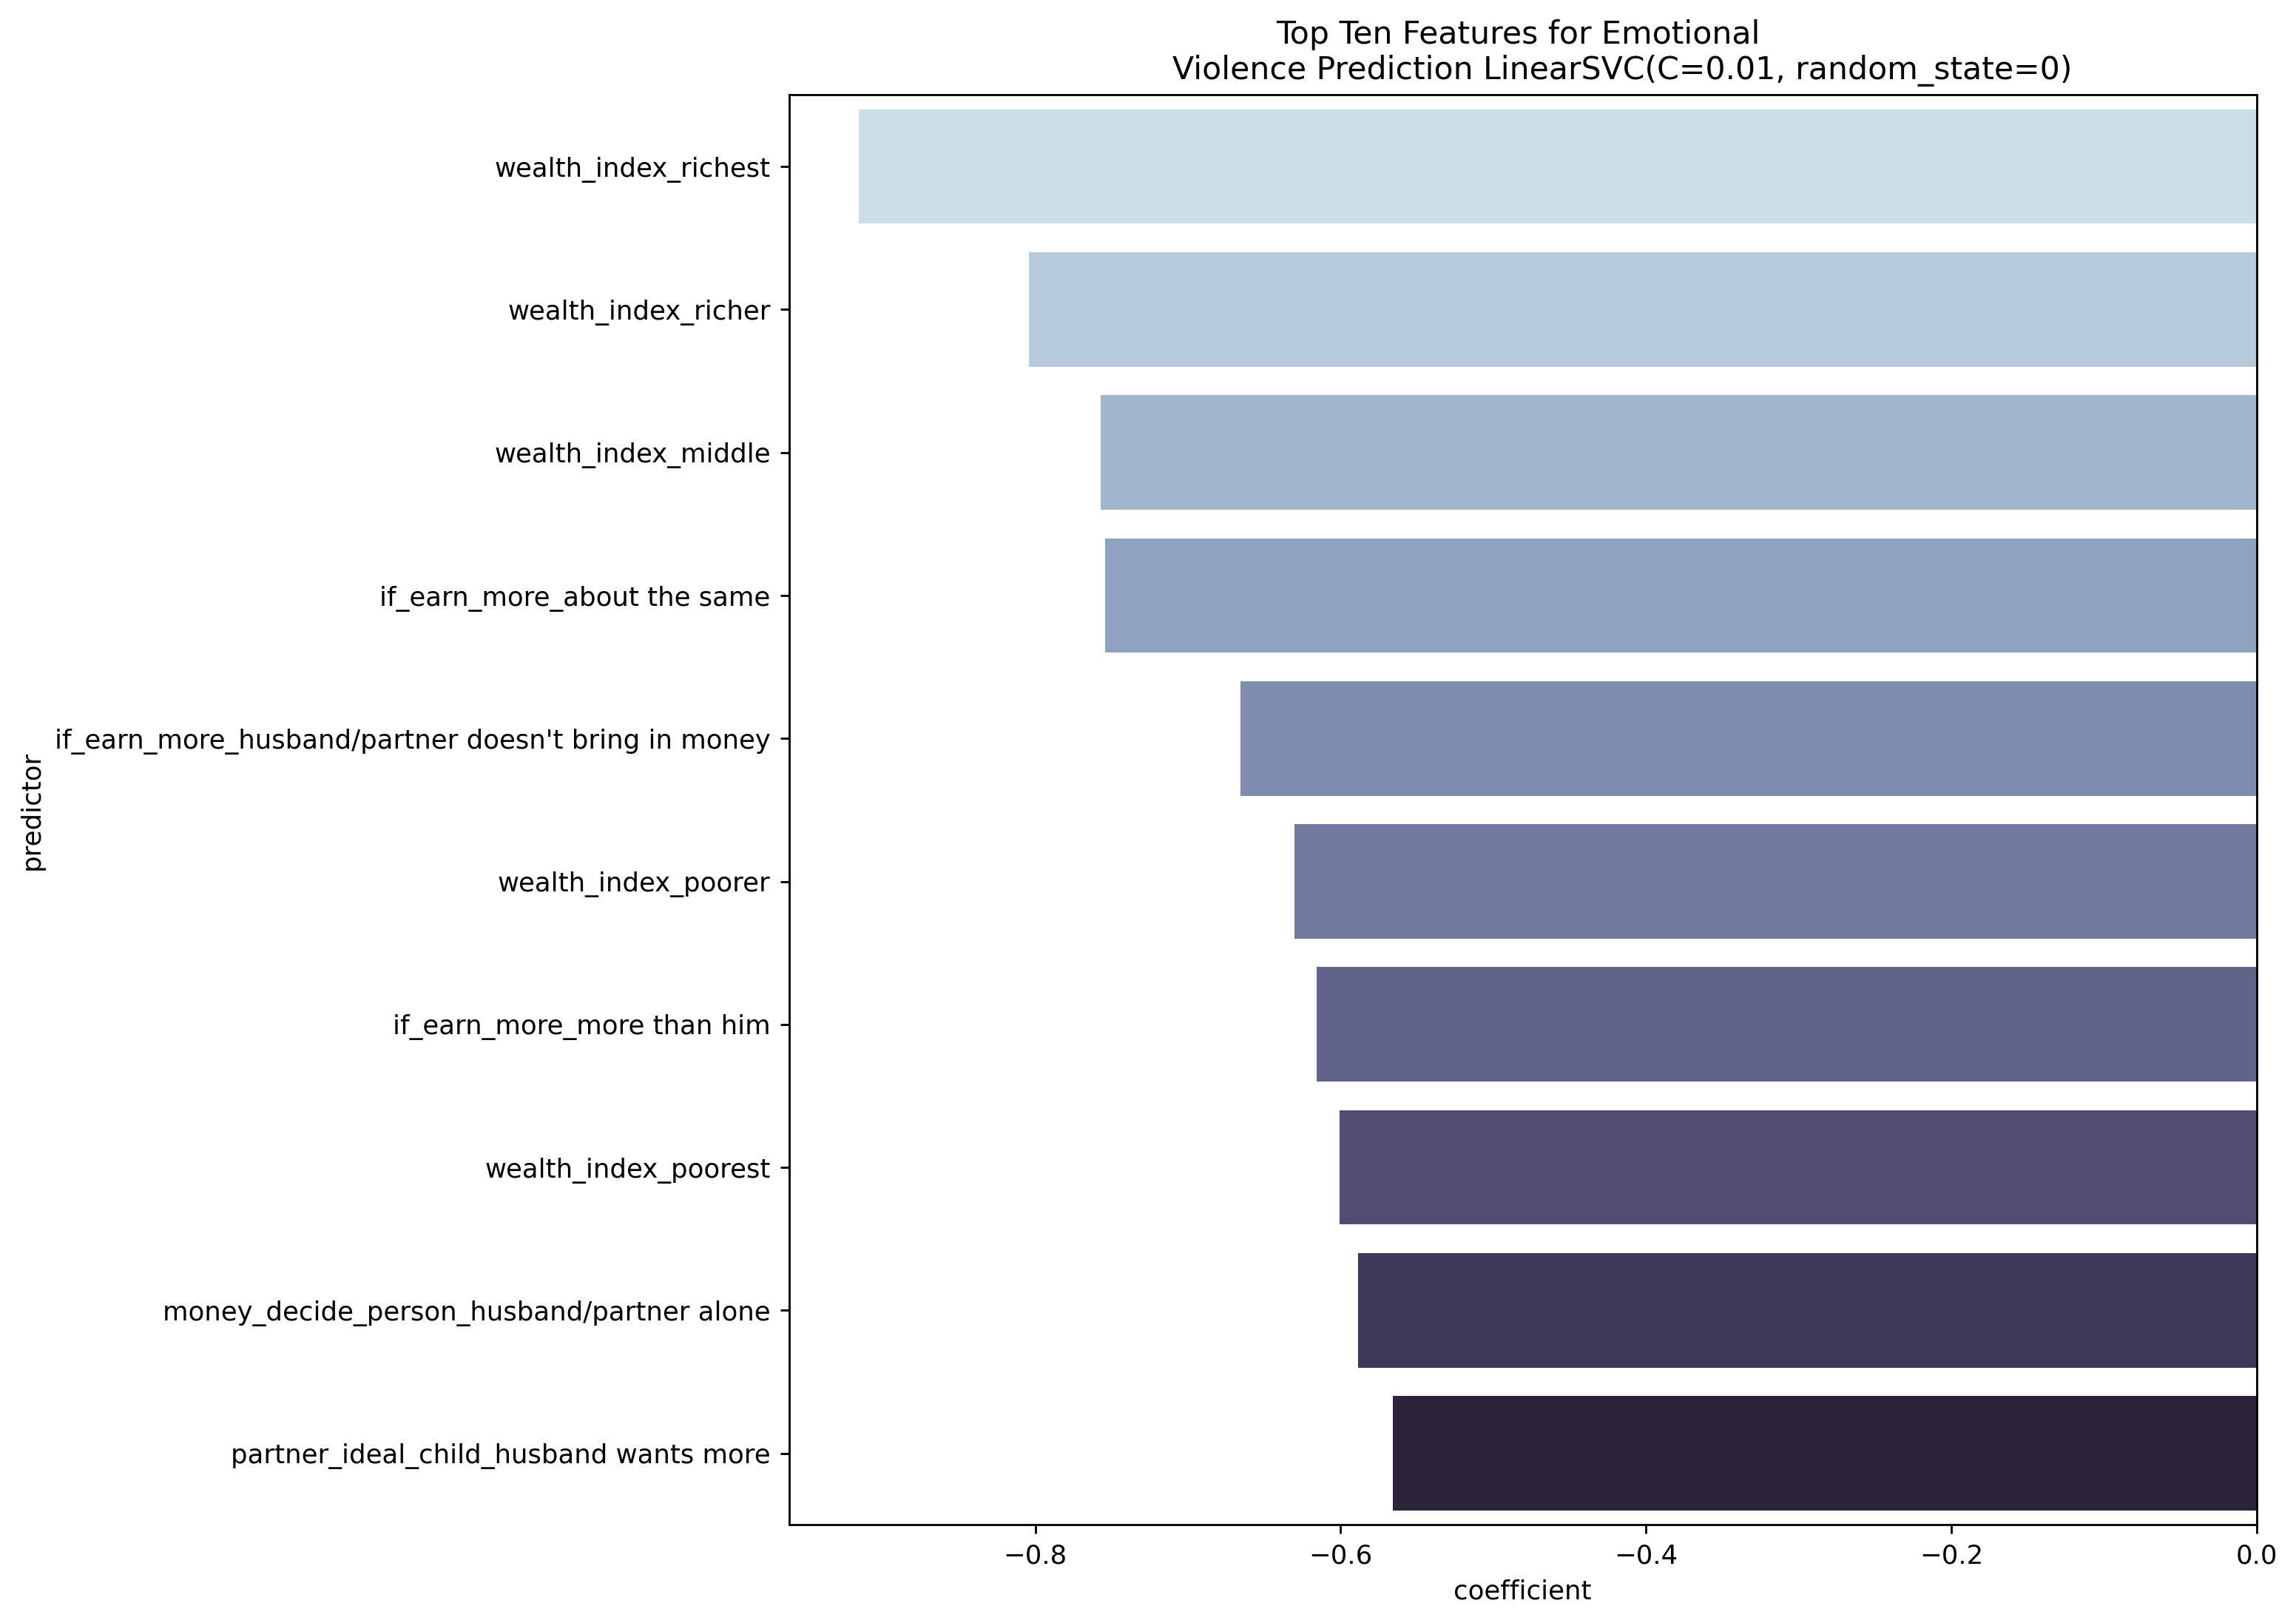

In [197]:
result, coeffs = pipeline_classification.analyze_country\
    (X_train, X_test, y_train1, y_test1, 'All', 'if_emo_vil', 0.5, 'SVC')

In [198]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_emo_vil,LinearSVC,{'linearsvc__C': 0.01},0.277106,0.728861,0.288106,0.267414,0.607503
1,All,if_emo_vil,LinearSVC,{'linearsvc__C': 0.1},0.168322,0.778505,0.316520,0.115424,0.604324
2,All,if_emo_vil,LinearSVC,{'linearsvc__C': 1},0.158353,0.778095,0.305328,0.107687,0.604351
3,All,if_emo_vil,LinearSVC,{'linearsvc__C': 10},0.184516,0.772504,0.311914,0.132990,0.604820
4,All,if_emo_vil,LinearSVC,{'linearsvc__C': 100},0.223555,0.669914,0.253536,0.285078,0.548181


## Target 2: if have physical violence

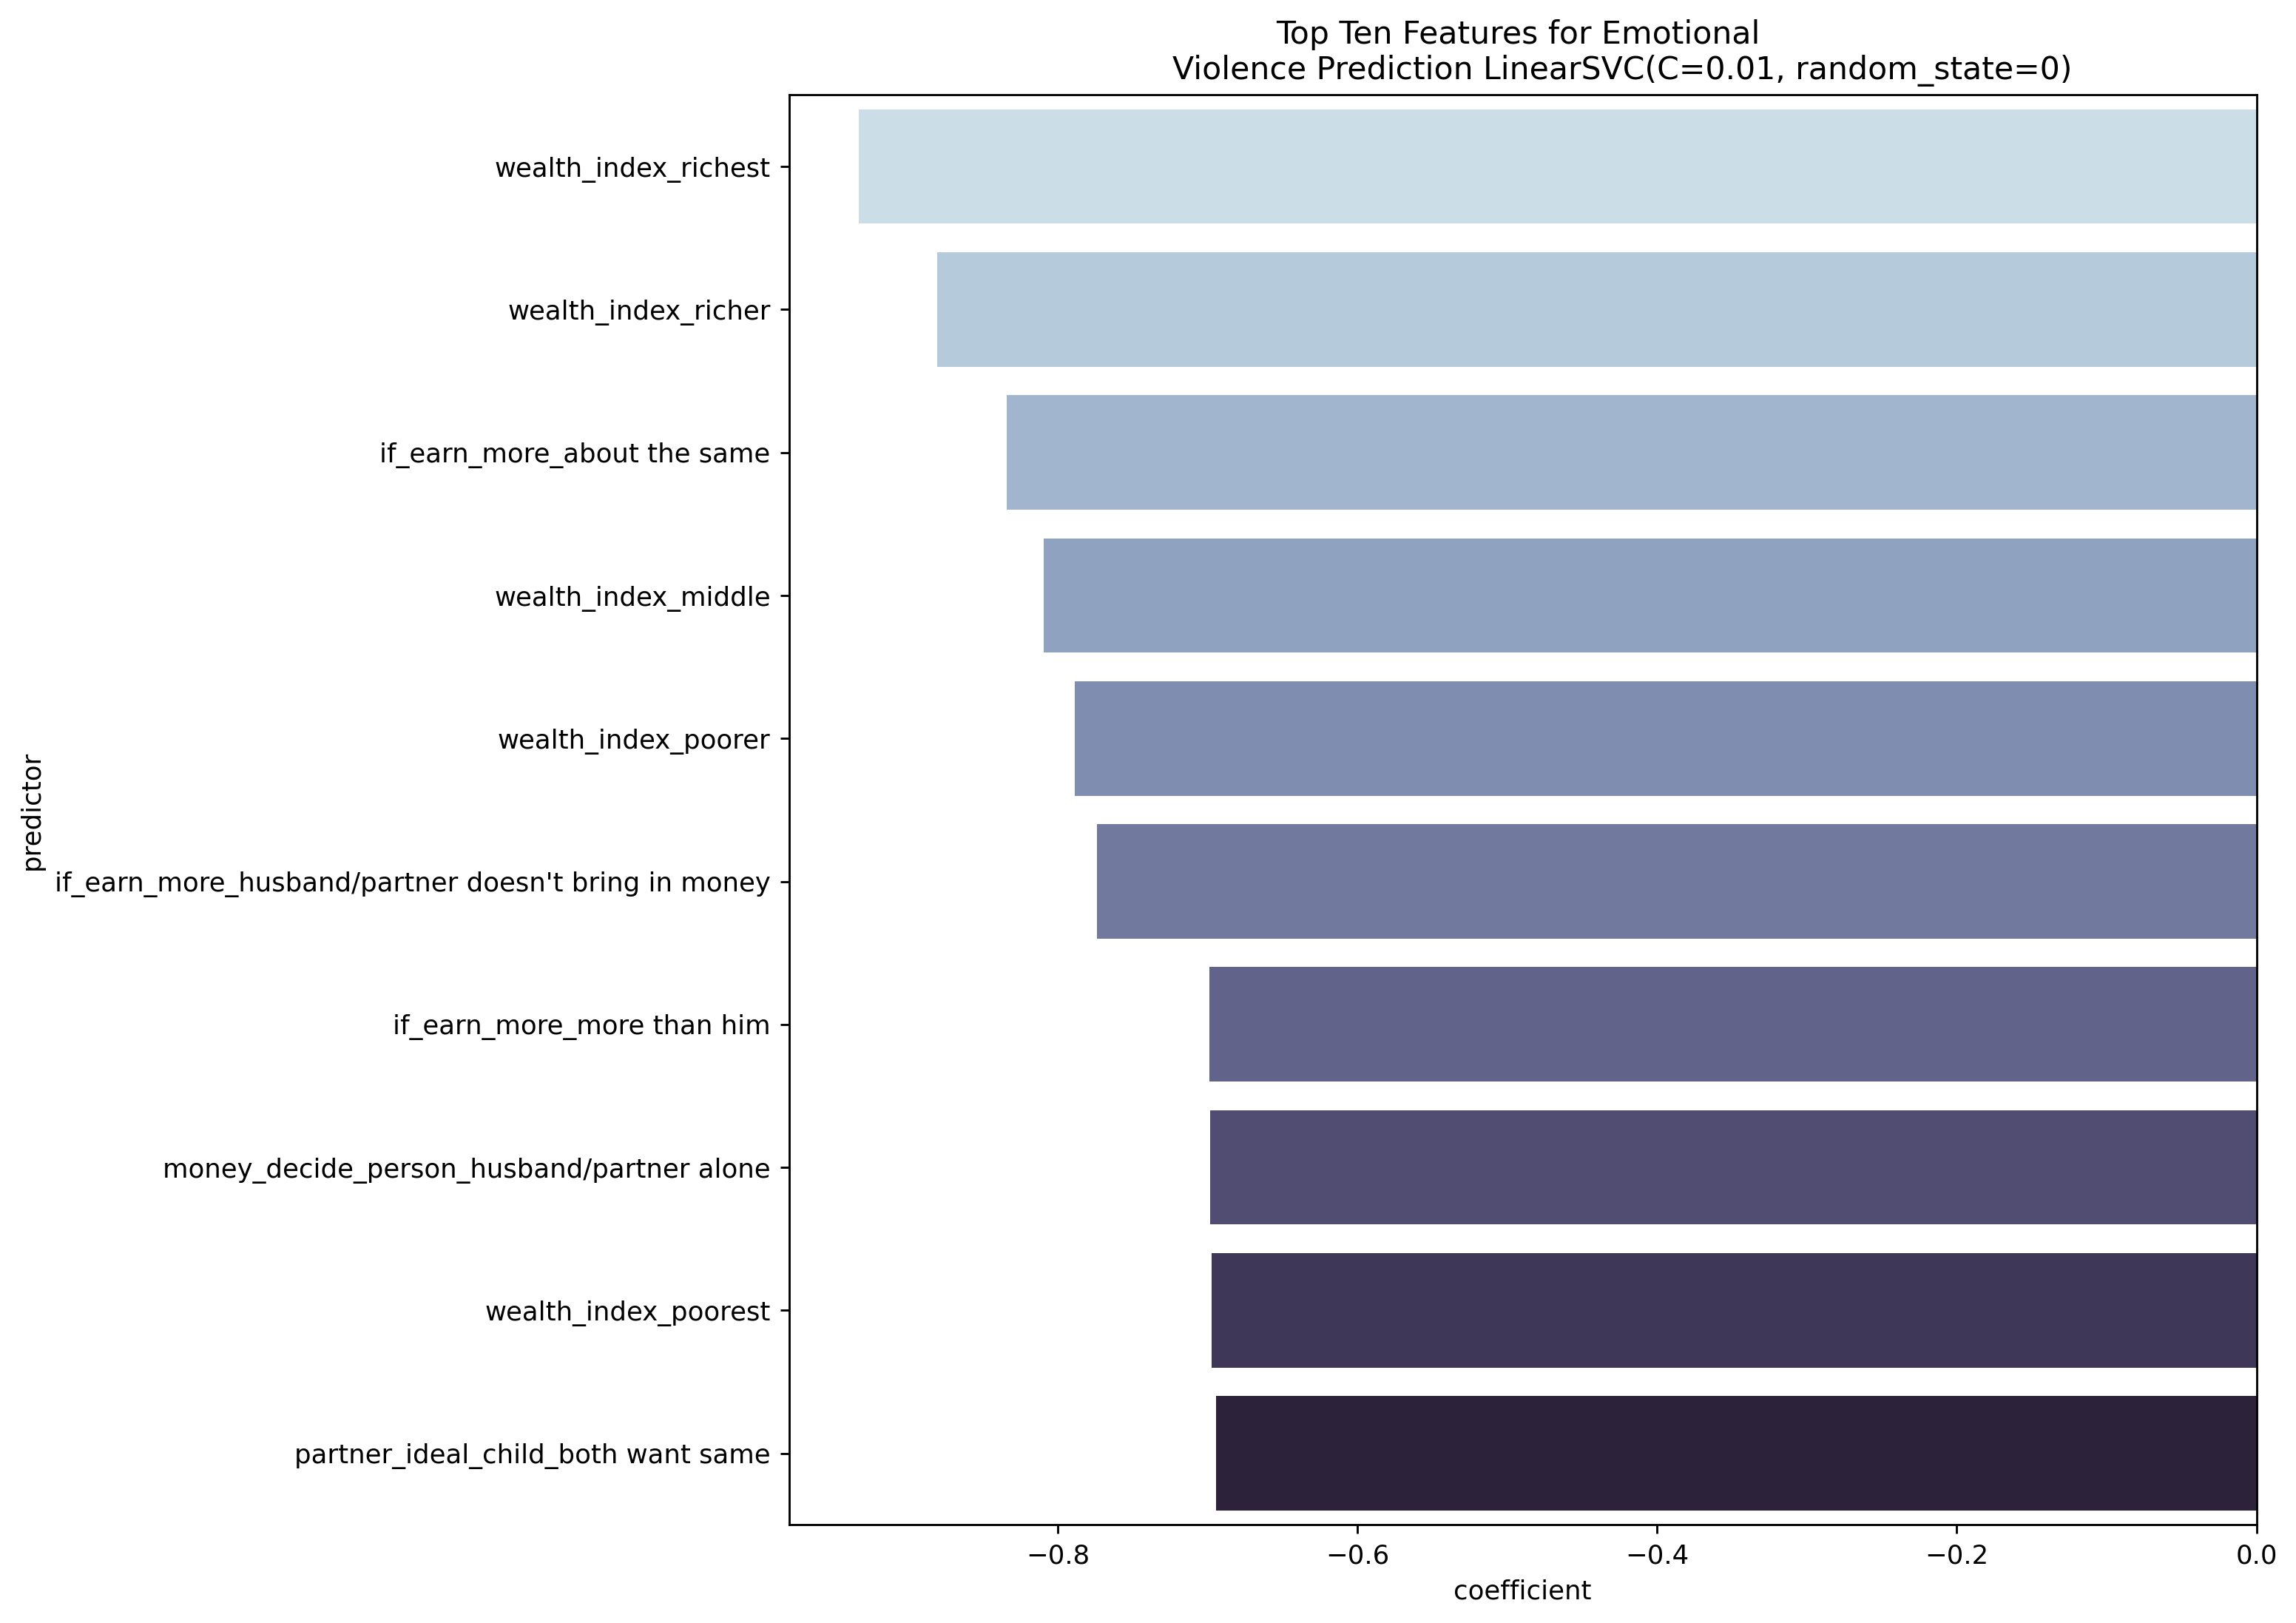

In [199]:
result, coeffs = pipeline_classification.analyze_country\
    (X_train, X_test, y_train2, y_test2, 'All', 'if_phy_vil', 0.5, 'SVC')

In [200]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_phy_vil,LinearSVC,{'linearsvc__C': 0.01},0.247860,0.819693,0.263654,0.234853,0.651219
1,All,if_phy_vil,LinearSVC,{'linearsvc__C': 0.1},0.147955,0.854064,0.286164,0.100210,0.647704
2,All,if_phy_vil,LinearSVC,{'linearsvc__C': 1},0.145776,0.854746,0.288567,0.098060,0.647269
3,All,if_phy_vil,LinearSVC,{'linearsvc__C': 10},0.162577,0.855700,0.302777,0.112027,0.647028
4,All,if_phy_vil,LinearSVC,{'linearsvc__C': 100},0.161865,0.762426,0.147512,0.200327,0.554295


## Target 3: if have sexual violence

In [ ]:
result, coeffs = pipeline_classification.analyze_country\
    (X_train, X_test, y_train3, y_test3, 'All', 'if_sex_vil', 0.5, 'SVC')

In [201]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_phy_vil,LinearSVC,{'linearsvc__C': 0.01},0.247860,0.819693,0.263654,0.234853,0.651219
1,All,if_phy_vil,LinearSVC,{'linearsvc__C': 0.1},0.147955,0.854064,0.286164,0.100210,0.647704
2,All,if_phy_vil,LinearSVC,{'linearsvc__C': 1},0.145776,0.854746,0.288567,0.098060,0.647269
3,All,if_phy_vil,LinearSVC,{'linearsvc__C': 10},0.162577,0.855700,0.302777,0.112027,0.647028
4,All,if_phy_vil,LinearSVC,{'linearsvc__C': 100},0.161865,0.762426,0.147512,0.200327,0.554295


## Target 4: if have violence

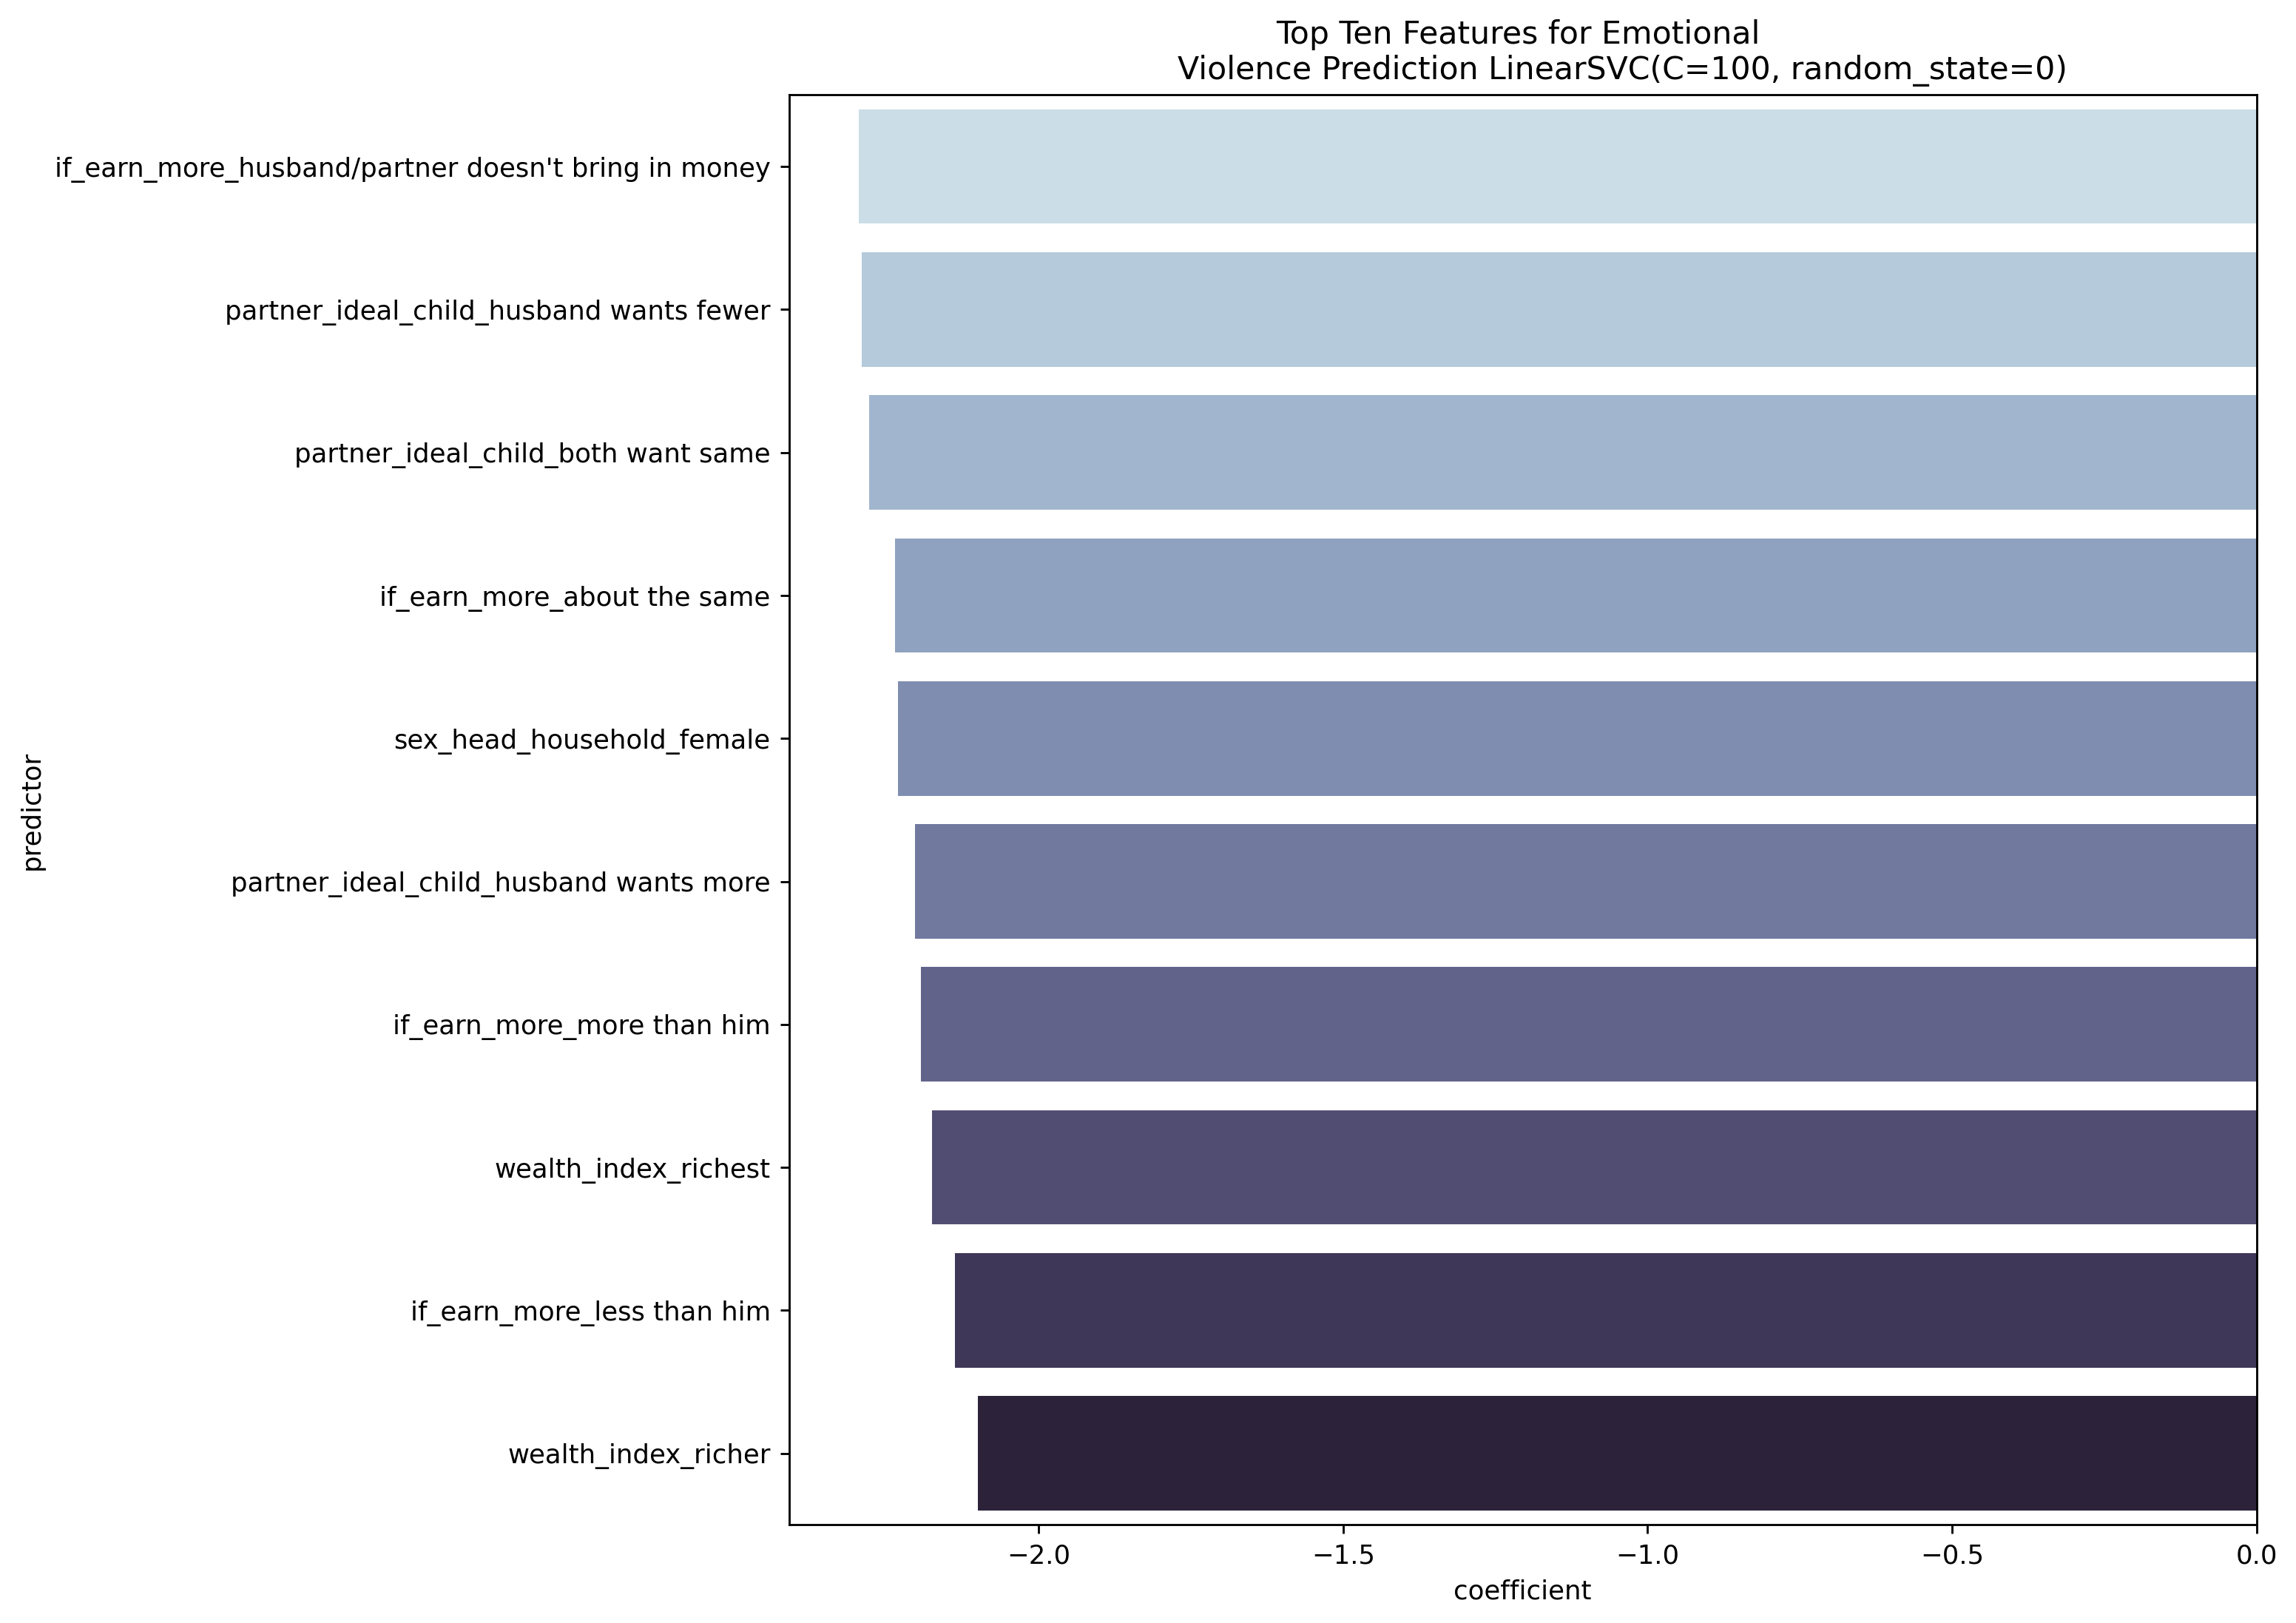

In [203]:
result, coeffs = pipeline_classification.analyze_country\
    (X_train, X_test, y_train3, y_test3, 'All', 'if_vil', 0.5, 'SVC')

In [204]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_vil,LinearSVC,{'linearsvc__C': 0.01},0.064872,0.949400,0.124670,0.045074,0.626334
1,All,if_vil,LinearSVC,{'linearsvc__C': 0.1},0.000000,0.960175,0.000000,0.000000,0.621013
2,All,if_vil,LinearSVC,{'linearsvc__C': 1},0.000000,0.960038,0.000000,0.000000,0.618043
3,All,if_vil,LinearSVC,{'linearsvc__C': 10},0.000000,0.960038,0.000000,0.000000,0.615911
4,All,if_vil,LinearSVC,{'linearsvc__C': 100},0.086498,0.849829,0.102449,0.204680,0.566646
